Racial Disparity and Other Predictive Features of Cannabis Arrests in NYC between 2006-2018

As has been reported (Levine, 2017; Harcourt & Ludwig, 2006; Mueller, Gebeloff, & Chinoy, 2018), data on low-level cannabis possession arrests in New York City have shown that they have been predominantly of young African-American and Latino men since at least 1987. Given the history of the drug war under President Nixon and earlier under Harry Anslinger during his years as the first Commissioner of the U.S. Treasury Department's Federal Bureau of Narcotics, this racial disparity of low-level cannabis arrests has likely remained constant since the Marijuana Tax Act of 1937 passed, which effectively made the plant illegal. Data from the Substance Abuse and Mental Health Services Administration of the U.S. Department of Health and Human Services shows consistently that people of different racial groups use cannabis at effectively the same rate (SAMHSA, 2016).

This racial disparity in cannabis arrests continues to this day through the mayoral transition to Mayor DeBlasio from Mayor Bloomberg's policy era of stop-and-frisk, even while cannabis arrests have dropped since their height around 2011 (Levine). At the same time, overall crime has dropped in New York City (Mueller, Gebeloff, & Chinoy, 2018). The New York Police Department (NYPD) has been pressed to explain this disparity, and has responded by saying that it is due to the fact that they receive more cannabis-related complaints from neighborhoods which are predominantly occupied by African-American and Latino residents. 

The New York Times has done an analysis exploring this claim, and has shown that even between neighborhoods that have the same level of cannabis-related complaints, more cannabis arrests occur in neighborhoods with a majority of African-American and Latino residents (Mueller, Gebeloff, & Chinoy, 2018). One explanation for the racial disparity is that these neighborhoods are often more policed because of the higher rate of violent crimes there. Another explanation is that when people are arrested for cannabis, NYPD officers are able to check for open warrants and are therefore a way for police officers to cut down on other types of crime through these arrests. But these explanations do not fully illustrate the reasons that this racial disparity in low-level of cannabis arrests persists during an era of criminal justice reform. 

While looking at both low-level and more serious cannabis arrests including felony sales, this report aims to provide a more full picture of the factors that trigger cannabis arrests in New York City. In order to do so, machine learning classification methods will be applied to predict the following five target variables: misdemeanor cannabis possession, violation cannabis possession, felony cannabis possession, misdemeanor cannabis sales, and felony cannabis sales. This will then be repeated using all cannabis crimes where the suspect's race was recorded, which was a significant minority of cases. Violation sales were not used as a target variable as there were no cases designated as such.

Classification methods will also be used to try and differentiate cannabis crimes from non-cannabis crimes. This will be done using all cannabis crimes and a set of non-cannabis crimes of the same size randomly selected from the larger pool of non-cannabis crimes. This will then be repeated using all cannabis crimes where the suspect's race was recorded and a set of non-cannabis crimes of the same size randomly selected from the larger pool of non-cannabis crimes where the suspect's race is recorded. This needs to be done as the majority of crimes in the dataset being used (see below) do not have the suspect's race recorded.

These methods will be used on all cannabis crimes between January 1st, 2006 and December 31st, 2018 in New York City as reported by the NYPD's Complaint Data historic dataset. A set of features from the original dataset and a set of features derived from this data will be used to create a model that will hopefully identify several salient predictors of cannabis arrests in New York City during modern times. Hopefully this project will present a fuller image of cannabis arrests that can be used to improve drug policy in New York City and in the rest of the country.

The NYPD Complaint Data Historic dataset contains data on all valid misdemeanor, violation, and felony crimes reported by the New York Police Department between 2006 and 2018. It is openly supplied to the public through the NYC Open Data project at https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i. 

This dataset of all NYC crimes was filtered to only include cannabis arrests, and then the five target features were created as described above from penal code and law category features native to the original dataset. Missing data was filled in or dropped as described in the data cleaning report. A datetime feature was created from separate date and time features for when the crime was committed, and for when the crime ended if the crime was recorded as spanning more than one day. Duration of the crime was also computed. The raw crime start time feature was used to create a set of time-window features that may be predictive of cannabis crimes. The distance of each cannabis crime from prominent NYC landmarks was encoded into continuous data features. Isolated year, month, and date features were extracted from the crime start datetime feature. Along with being useful data to have on their own, these extracted features were used to define holidays. Cases outside of the stated year range of the dataset were dropped, that is, cases earlier than 2006. Unclear values were recoded to ‘unknown’ for the suspect and victim age group, race, and sex features. 

This cleaned DataFrame was then exported for traditional exploratory data analysis. Another DataFrame for machine learning purposes was exported after binary features were created from several categorical features via pandas' .get_dummies() method. Several other features were dropped from this machine learning DataFrame as they were superfluous or would have interfered with machine learning functions. A cleaned DataFrame of cannabis crimes where the suspect's race was reported was also created; one for EDA and one for machine learning. This process was repeated for non-cannabis crimes in order to later run the classification differentiating cannabis crimes from non-cannabis crimes, including smaller DataFrames where the suspect's race was reported. Further details are in the data cleaning report.

Notably, suspect sex, age category, and race data was only available for approximately 35,000 cannabis arrests (approximately 16% of the cannabis crimes DataFrame). The NYC Open Data project was contacted, and they verified this information was correct, as police officers are not required to record this demographic information. 

In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
#import seaborn as sns
%matplotlib inline
#from plotly import express

In [2]:
pd.set_option('display.max_columns', 550)
pd.set_option('display.width', 1000)

In [3]:
nyc = pd.read_csv('nyc_cann_no_dummies_for_EDA.csv', index_col=0)

Exploring the DataFrame with some basic exploratory functions can help to identify the pool of predictive features both built into the DataFrame and derived from the DataFrame, which was done during the data cleaning phase. 

In [4]:
nyc.shape

(220305, 132)

In [5]:
nyc.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220305 entries, 148 to 6480628
Data columns (total 132 columns):
CMPLNT_NUM                int64
CMPLNT_FR_DT              object
CMPLNT_FR_TM              object
CMPLNT_TO_DT              object
CMPLNT_TO_TM              object
ADDR_PCT_CD               float64
RPT_DT                    object
KY_CD                     int64
OFNS_DESC                 object
PD_CD                     float64
PD_DESC                   object
CRM_ATPT_CPTD_CD          object
LAW_CAT_CD                object
BORO_NM                   object
LOC_OF_OCCUR_DESC         object
PREM_TYP_DESC             object
JURIS_DESC                object
HADEVELOPT                object
X_COORD_CD                float64
Y_COORD_CD                float64
TRANSIT_DISTRICT          object
Latitude                  float64
Longitude                 float64
Lat_Lon                   object
PATROL_BORO               object
STATION_NAME              object
possession             

The DataFrame has 220,305 cannabis arrests, and 132 features. In the machine learning DataFrame, this feature set is expanded after running pandas' .get_dummies() method on the categorical features. These features are 
maintained as categorical during this section of the report for more traditional exploratory data analysis. Further basic exploratory methods are called for reference.

In [6]:
nyc.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,HADEVELOPT,X_COORD_CD,Y_COORD_CD,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,possession,sales,misdemeanor,violation,felony,misd_poss,viol_poss,felony_poss,misd_sales,viol_sales,felony_sales,date_time_start,date_time_end,day_tw,night_tw,early_morn,morn_rush_hr,work_day,lunch_hr,eve_rush_hr,dinner,evening,late_night,wtc_taxi,wtc_crow,nyse_taxi,nyse_crow,bk_bridge_taxi,bk_bridge_crow,city_hall_taxi,city_hall_crow,manh_bridge_taxi,manh_bridge_crow,will_bridge_taxi,will_bridge_crow,wash_sq_park_taxi,wash_sq_park_crow,union_sq_taxi,union_sq_crow,penn_station_taxi,penn_station_crow,times_sq_taxi,times_sq_crow,rock_center_taxi,rock_center_crow,empire_st_bldg_taxi,empire_st_bldg_crow,lincoln_ctr_taxi,lincoln_ctr_crow,central_pk_taxi,central_pk_crow,apollo_th_taxi,apollo_th_crow,yankee_stad_taxi,yankee_stad_crow,mets_stad_taxi,mets_stad_crow,queens_taxi,queens_crow,prospect_pk_taxi,prospect_pk_crow,downtown_bk_taxi,downtown_bk_crow,si_ferry_taxi,si_ferry_crow,port_authority_taxi,port_authority_crow,nypd_hq_taxi,nypd_hq_crow,mdc_taxi,mdc_crow,rikers_taxi,rikers_crow,nysc_taxi,nysc_crow,duration,start_year,start_month,start_day,new_years_day,new_years_eve,christmas_eve,christmas,july_4th,valentines,halloween,st_patricks,mlk,pres,easter,diwali,pr_parade,yomkippur,rosh_hashanah,eid_al_fitr,eid_al_adha,hannukkah,memorial_day,labor_day,thanksgiving,SUSP_AGE_GROUP_cleaned,SUSP_RACE_cleaned,SUSP_SEX_cleaned,VIC_AGE_GROUP_cleaned,VIC_RACE_cleaned,VIC_SEX_cleaned
148,498164466,12/31/2018,21:55:00,12/31/2018,22:12:00,62.0,12/31/2018,235,DANGEROUS DRUGS,567.0,"MARIJUANA, POSSESSION 4 & 5",COMPLETED,MISDEMEANOR,BROOKLYN,unknown,STREET,N.Y. POLICE DEPT,not_housing_devpt_crime,979947.0,160366.0,not_transit_related,40.606851,-74.015498,"(40.60685112, -74.015498354)",PATROL BORO BKLYN SOUTH,not_transit_related,1,0,1,0,0,1,0,0,0,0,0,2018-12-31 21:55:00,2018-12-31 22:12:00,0,1,0,0,0,0,0,0,1,0,0.107947,0.105870,0.104259,0.100115,0.117847,0.100976,0.115347,0.106365,0.125347,0.103635,0.149847,0.115121,0.142147,0.125278,0.153447,0.131335,0.165747,0.145422,0.183147,0.155275,0.188647,0.156244,0.171347,0.144651,0.197647,0.168711,0.226147,0.183038,0.268547,0.213416,0.312047,0.239982,0.317647,0.225146,0.341947,0.251772,0.099847,0.070769,0.120247,0.094479,0.163867,0.138854,0.175047,0.152364,0.118055,0.105979,0.122647,0.110856,0.315747,0.226845,0.121047,0.108393,0 days 00:17:00.000000000,2018,12,31,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25-44,BLACK HISPANIC,M,unknown,unknown,unknown
536,145023256,12/31/2018,17:00:00,12/31/2018,17:07:00,26.0,12/31/2018,235,DANGEROUS DRUGS,567.0,"MARIJUANA, POSSESSION 4 & 5",COMPLETED,MISDEMEANOR,MANHATTAN,FRONT OF,STREET,N.Y. POLICE DEPT,not_housing_devpt_crime,997349.0,235298.0,not_transit_related,40.812513,-73.952681,"(40.812512958, -73.952680664)",PATROL BORO MAN NORTH,not_transit_related,1,0,1,0,0,1,0,0,0,0,0,2018-12-31 17:00:00,2018-12-31 17:07:00,1,0,0,0,1,0,1,0,0,0,0.160532,0.116831,0.164220,0.120794,0.150632,0.115235,0.153132,0.113121,0.143132,0.111718,0.118632,0.100859,0.126332,0.093102,0.115032,0.085706,0.102732,0.074158,0.085332,0.062258,0.079832,0.059773,0.097132,0.072116,0.070832,0.050506,0.042332,0.032229,0.005094,0.003602,0.043568,0.031515,0.164794,0.121603,0.242094,0.178895,0.168632,0.153185,0.148232,0.120683,0.432346,0.306695,0.093432,0.067176,0.150425,0.112202,0.145832,0.107957,0.086094,0.069449,0.147432,0.109811,0 days 00:07:00.000000000,2018,12,31,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18-24,BLACK,M,unknown,unknown,unknown
899,286264352,12/30/2018,17:25:00,12/30/2018,17:29:00,109.0,12/30/2018,678,MISCELLANEOUS PENAL LAW,566.0,"MARIJUANA, POSSESSION",COMPLETED,VIOLATION,QUEENS,unknown,STREET,N.Y. POLICE DEPT,not_housing_devpt_crime,1030153.0,215586.0,not_transit_related,40.758299,-73.834309,"(40.

In [7]:
nyc.tail()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,HADEVELOPT,X_COORD_CD,Y_COORD_CD,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,possession,sales,misdemeanor,violation,felony,misd_poss,viol_poss,felony_poss,misd_sales,viol_sales,felony_sales,date_time_start,date_time_end,day_tw,night_tw,early_morn,morn_rush_hr,work_day,lunch_hr,eve_rush_hr,dinner,evening,late_night,wtc_taxi,wtc_crow,nyse_taxi,nyse_crow,bk_bridge_taxi,bk_bridge_crow,city_hall_taxi,city_hall_crow,manh_bridge_taxi,manh_bridge_crow,will_bridge_taxi,will_bridge_crow,wash_sq_park_taxi,wash_sq_park_crow,union_sq_taxi,union_sq_crow,penn_station_taxi,penn_station_crow,times_sq_taxi,times_sq_crow,rock_center_taxi,rock_center_crow,empire_st_bldg_taxi,empire_st_bldg_crow,lincoln_ctr_taxi,lincoln_ctr_crow,central_pk_taxi,central_pk_crow,apollo_th_taxi,apollo_th_crow,yankee_stad_taxi,yankee_stad_crow,mets_stad_taxi,mets_stad_crow,queens_taxi,queens_crow,prospect_pk_taxi,prospect_pk_crow,downtown_bk_taxi,downtown_bk_crow,si_ferry_taxi,si_ferry_crow,port_authority_taxi,port_authority_crow,nypd_hq_taxi,nypd_hq_crow,mdc_taxi,mdc_crow,rikers_taxi,rikers_crow,nysc_taxi,nysc_crow,duration,start_year,start_month,start_day,new_years_day,new_years_eve,christmas_eve,christmas,july_4th,valentines,halloween,st_patricks,mlk,pres,easter,diwali,pr_parade,yomkippur,rosh_hashanah,eid_al_fitr,eid_al_adha,hannukkah,memorial_day,labor_day,thanksgiving,SUSP_AGE_GROUP_cleaned,SUSP_RACE_cleaned,SUSP_SEX_cleaned,VIC_AGE_GROUP_cleaned,VIC_RACE_cleaned,VIC_SEX_cleaned
6480505,143571007,01/01/2006,21:45:00,00/00/0000,00:00:00,73.0,01/01/2006,235,DANGEROUS DRUGS,567.0,"MARIJUANA, POSSESSION 4 & 5",COMPLETED,MISDEMEANOR,BROOKLYN,unknown,STREET,N.Y. POLICE DEPT,not_housing_devpt_crime,1010049.0,183477.0,not_transit_related,40.670249,-73.907000,"(40.670249345, -73.907000055)",PATROL BORO BKLYN NORTH,not_transit_related,1,0,1,0,0,1,0,0,0,0,0,2006-01-01 21:45:00,NaN,0,1,0,0,0,0,0,0,1,0,0.148851,0.114556,0.140893,0.110511,0.125751,0.096785,0.141651,0.107849,0.121051,0.091706,0.108751,0.078463,0.150851,0.108722,0.149751,0.106690,0.166851,0.118061,0.166251,0.117826,0.160151,0.113861,0.156851,0.110911,0.178751,0.127701,0.171051,0.126889,0.182851,0.146246,0.178551,0.160503,0.145751,0.104353,0.170051,0.126193,0.072049,0.062809,0.103351,0.081698,0.335763,0.260998,0.170751,0.120759,0.137437,0.104374,0.142751,0.106778,0.143851,0.124633,0.139151,0.104758,NaN,2006,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unknown,unknown,unknown,unknown,unknown,unknown
6480506,575819737,01/01/2006,01:10:00,00/00/0000,00:00:00,71.0,01/01/2006,235,DANGEROUS DRUGS,567.0,"MARIJUANA, POSSESSION 4 & 5",COMPLETED,MISDEMEANOR,BROOKLYN,FRONT OF,STREET,N.Y. POLICE DEPT,not_housing_devpt_crime,1000130.0,180995.0,not_transit_related,40.663460,-73.942762,"(40.663460155, -73.942762342)",PATROL BORO BKLYN SOUTH,not_transit_related,1,0,1,0,0,1,0,0,0,0,0,2006-01-01 01:10:00,NaN,0,1,0,0,0,0,0,0,0,1,0.119878,0.086106,0.111920,0.081103,0.096778,0.068913,0.112678,0.080287,0.092078,0.065170,0.079778,0.058244,0.121878,0.086655,0.120778,0.087087,0.137878,0.100835,0.137278,0.104259,0.131178,0.101795,0.127878,0.095176,0.149778,0.116401,0.142078,0.121566,0.153878,0.146723,0.182702,0.166963,0.188302,0.133213,0.212602,0.161414,0.029498,0.026439,0.074378,0.052985,0.293212,0.225202,0.141778,0.105332,0.108464,0.077110,0.113778,0.080592,0.186402,0.141522,0.110178,0.078128,NaN,2006,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unknown,unknown,unknown,unknown,unknown,unknown
6480522,406166394,01/01/2006,01:16:00,01/01/2006,01:26:00,9.0,01/01/2006,235,DANGEROUS DRUGS,567.0,"MARIJUANA, POSSESSION 4 & 5",COMPLETED,MISDEMEANOR,MANHATTAN,INSIDE,unknown,N.Y. POLICE DEPT,not_housing_devpt_crime,987274.0,206096.0,not_transit_related,40.732370,-73.989090,"(40.732370284, -73.989090237)",PATROL BORO MAN SOUTH,not_

In [8]:
nyc.describe(include='all')

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,HADEVELOPT,X_COORD_CD,Y_COORD_CD,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,possession,sales,misdemeanor,violation,felony,misd_poss,viol_poss,felony_poss,misd_sales,viol_sales,felony_sales,date_time_start,date_time_end,day_tw,night_tw,early_morn,morn_rush_hr,work_day,lunch_hr,eve_rush_hr,dinner,evening,late_night,wtc_taxi,wtc_crow,nyse_taxi,nyse_crow,bk_bridge_taxi,bk_bridge_crow,city_hall_taxi,city_hall_crow,manh_bridge_taxi,manh_bridge_crow,will_bridge_taxi,will_bridge_crow,wash_sq_park_taxi,wash_sq_park_crow,union_sq_taxi,union_sq_crow,penn_station_taxi,penn_station_crow,times_sq_taxi,times_sq_crow,rock_center_taxi,rock_center_crow,empire_st_bldg_taxi,empire_st_bldg_crow,lincoln_ctr_taxi,lincoln_ctr_crow,central_pk_taxi,central_pk_crow,apollo_th_taxi,apollo_th_crow,yankee_stad_taxi,yankee_stad_crow,mets_stad_taxi,mets_stad_crow,queens_taxi,queens_crow,prospect_pk_taxi,prospect_pk_crow,downtown_bk_taxi,downtown_bk_crow,si_ferry_taxi,si_ferry_crow,port_authority_taxi,port_authority_crow,nypd_hq_taxi,nypd_hq_crow,mdc_taxi,mdc_crow,rikers_taxi,rikers_crow,nysc_taxi,nysc_crow,duration,start_year,start_month,start_day,new_years_day,new_years_eve,christmas_eve,christmas,july_4th,valentines,halloween,st_patricks,mlk,pres,easter,diwali,pr_parade,yomkippur,rosh_hashanah,eid_al_fitr,eid_al_adha,hannukkah,memorial_day,labor_day,thanksgiving,SUSP_AGE_GROUP_cleaned,SUSP_RACE_cleaned,SUSP_SEX_cleaned,VIC_AGE_GROUP_cleaned,VIC_RACE_cleaned,VIC_SEX_cleaned
count,2.203050e+05,220305,220305,220305,220305,220305.000000,220305,220305.000000,220305,220305.000000,220305,220305,220305,220305,220305,220305,220305,220305,2.203050e+05,2.203050e+05,220305,220305.000000,220305.000000,220305,220305,220305,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.0,220305.000000,220305,153112,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,153112,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.00000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305.000000,220305,220305,220305,220305,220305,220305
unique,NaN,4728,1414,4721,1430,NaN,4727,NaN,2,NaN,5,2,3,6,5,69,19,258,NaN,NaN,13,NaN,NaN,32981,9,309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193683,142780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,7,3,6,7,3
top,NaN,02/18/2011,21:00:00,00/00/0000,00:00:00,NaN,02/18/2011,NaN,DANGEROUS DRUGS,NaN,"MARIJUANA, POSSESSION 4 & 5",COMPLETED,MISDEMEANOR,B

The set of features that compose the analytical frame for both initial EDA and later for machine learning purposes is shown in the following list, details of which include a user-friendly feature name, the original dataset's variable name, and an asterisk for those features which were converted into machine-learning friendly binary format for the machine learning classification phase.

Police Precinct Number* ('ADDR_PCT_CD')

Crime Completed/Attempted Flag* ('CRM_ATPT_CPTD_CD')

NYC Borough* ('BORO_NM')

Location of Crime Occurrence* ('LOC_OF_OCCUR_DESC')

Premises Type of Crime Occurrence* ('PREM_TYP_DESC')

Jurisdiction of Crime* (JURIS_DESC)

Housing Development of Crime Occurrence* ('HADEVELOPT')

Geographic NYC X and Y Coordinates of Crime ('X_COORD_CD', 'Y_COORD_CD')

Transit District of Crime Occurrence* ('TRANSIT_DISTRICT')

Geographic NYC Latitude, Longitude, and Latitude/Longitude Coordinates of Crime ('Latitude', 'Longitude', 'Lat_Lon')

Police Patrol Borough of Crime Occurrence* ('PATROL_BORO')

Transit Station Name of Crime Occurrence* ('STATION_NAME')

Datetime of Crime Start and End ('date_time_start' and 'date_time_end')

Time-windows of Crime Occurrences ('day_tw', 'night_tw', 'early_morn', 'morn_rush_hr', 'work_day', 'lunch_hr', 'eve_rush_hr', 'dinner', 'evening', 'late_night')

Distance From NYC Landmarks Which Crime Occurred ('landmark_taxi' and 'landmark_crow' series)

Duration of Crime ('duration')

Year Which Crime Occurred/Started ('start_year')

Month Which Crime Occurred/Started ('start_month')

Day Which Crime Occurred/Started ('start_day')

Holidays Which Crime Occurred/Started ('new_years_day', 'new_years_eve', 'christmas_eve', 'christmas', 'july_4th', 'valentines', 'halloween', 'st_patricks', 'mlk', 'pres', 'easter', 'diwali', 'pr_parade', 'yomkippur', 'rosh_hashanah', 'eid_al_fitr', 'eid_al_adha', 'hannukkah', 'memorial_day', 'labor_day', 'thanksgiving')

Suspect Age Group* (SUSP_AGE_GROUP_cleaned)	

Suspect Race* (SUSP_RACE_cleaned)

Suspect Sex* (SUSP_SEX_cleaned)

Victim Age Group* (VIC_AGE_GROUP_cleaned)

Victim Race* (VIC_RACE_cleaned)

Victim Sex* (VIC_SEX_cleaned)

In this exploratory data analysis (EDA) phase, the most important place to start is to look to see if this dataset from the NYPD corroborates the racial disparity in cannabis arrests reported elsewhere. As mentioned earlier, only 15.8% have the cannabis crime suspect's race reported, which is unfortunate and begs the question as to how often the crime suspect's race is reported in non-cannabis crimes. As reported in the data cleaning notebook for non-cannabis crimes, 38.1% have the suspect's race reported. This is a large difference, and will be the subject of a hypothesis test in the Statistical Methods section of this project to see if the difference is due to random chance.

In [9]:
round(nyc['SUSP_RACE_cleaned'].value_counts(normalize=True),3)*100

unknown                           84.2
BLACK                              8.1
WHITE HISPANIC                     4.3
BLACK HISPANIC                     1.8
WHITE                              1.3
ASIAN / PACIFIC ISLANDER           0.4
AMERICAN INDIAN/ALASKAN NATIVE     0.0
Name: SUSP_RACE_cleaned, dtype: float64

Although one can see in the above cell that blacks, white Hispanics, and black Hispanics constitute the majority of cannabis crimes whose suspect's race was reported, the DataFrame of only cases with suspect race reported is imported, so as to call the racial, age, and sex proportions of that group in a more clear manner.

In [10]:
nyc_susp_race_reported = pd.read_csv('nyc_cann_EDA_race_reported.csv', index_col=0)

In [11]:
race_value_counts = round(nyc_susp_race_reported['SUSP_RACE_cleaned'].value_counts(normalize=True),3)*100
race_value_counts

BLACK                             51.1
WHITE HISPANIC                    27.2
BLACK HISPANIC                    11.1
WHITE                              8.0
ASIAN / PACIFIC ISLANDER           2.3
AMERICAN INDIAN/ALASKAN NATIVE     0.2
Name: SUSP_RACE_cleaned, dtype: float64

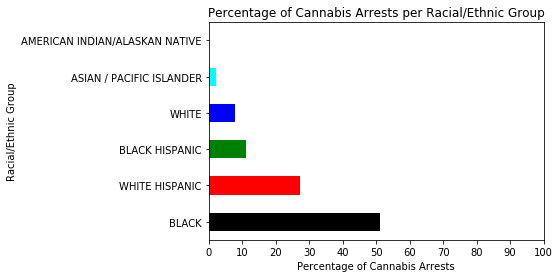

In [12]:
race_value_counts.plot(kind='barh', title='Percentage of Cannabis Arrests per Racial/Ethnic Group', xlim=(0, 100),
                      xticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], color=['black', 'red', 'green', 'blue', 'cyan', 'magenta'])
plt.xlabel('Percentage of Cannabis Arrests')
plt.ylabel('Racial/Ethnic Group')
plt.show()

As can be seen in the above cells, 51% of cannabis arrests with the suspect's race reported were of African-Americans, 27% were of white Hispanics, and 11% were of black Hispanics, for a combined total of 89% of the total cannabis crimes with the suspect's race reported. Only 8% of these arrests were of white people. This corroborates the racial disparity data reported elsewhere. Age group and sex of these arrests are reported below.

In [13]:
age_value_counts = round(nyc_susp_race_reported['SUSP_AGE_GROUP_cleaned'].value_counts(normalize=True).sort_index(),3)*100
age_value_counts

18-24      40.2
25-44      44.1
45-64       8.2
65+         0.2
<18         6.2
unknown     1.0
Name: SUSP_AGE_GROUP_cleaned, dtype: float64

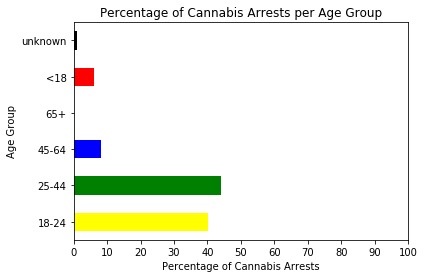

In [14]:
age_value_counts.plot(kind='barh', title='Percentage of Cannabis Arrests per Age Group', xlim=(0, 100),
                      xticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                      color=['yellow', 'green', 'blue', 'cyan', 'red', 'black'])
plt.xlabel('Percentage of Cannabis Arrests')
plt.ylabel('Age Group')
plt.show()

As can be seen above, a total of 84.3% of cannabis arrests were made of people between the ages of 18-44.

In [15]:
sex_value_counts = round(nyc_susp_race_reported['SUSP_SEX_cleaned'].value_counts(normalize=True),3)*100
sex_value_counts

M          89.5
F          10.4
unknown     0.1
Name: SUSP_SEX_cleaned, dtype: float64

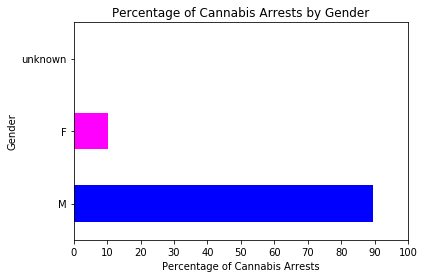

In [16]:
sex_value_counts.plot(kind='barh', title='Percentage of Cannabis Arrests by Gender', xlim=(0, 100),
                      xticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                      color=['blue', 'magenta', 'green'])
plt.xlabel('Percentage of Cannabis Arrests')
plt.ylabel('Gender')
plt.show()

The vast majority of cannabis arrests (89.5%) are of males.

In order to better validate findings elsewhere reported that young African-American and Latino men make up the majority of cannabis arrests in New York City, a crosstabulation of race, age, and sex is run below.

In [17]:
pd.crosstab(nyc_susp_race_reported.SUSP_RACE_cleaned, [nyc_susp_race_reported.SUSP_AGE_GROUP_cleaned, nyc_susp_race_reported.SUSP_SEX_cleaned], normalize=True)

SUSP_AGE_GROUP_cleaned             18-24                         25-44                         45-64                           65+                 <18             unknown                    
SUSP_SEX_cleaned                       F         M   unknown         F         M   unknown         F         M   unknown         F         M         F         M         F         M   unknown
SUSP_RACE_cleaned                                                                                                                                                                             
AMERICAN INDIAN/ALASKAN NATIVE  0.000086  0.001033  0.000000  0.000029  0.000832  0.000000  0.000000  0.000086  0.000000  0.000000  0.000000  0.000029  0.000287  0.000000  0.000000  0.000029
ASIAN / PACIFIC ISLANDER        0.000746  0.011281  0.000000  0.000459  0.008468  0.000000  0.000000  0.000603  0.000000  0.000000  0.000000  0.000115  0.001579  0.000000  0.000086  0.000000
BLACK                           0.024399  0.160289  0.000029  0.022591  0.217613  0.000115  0.002957  0.047909  0.000029  0.000057  0.001464  0.003875  0.023222  0.000344  0.006057  0.000287
BLACK HISPANIC                  0.005081  0.046014  0.000000  0.003646  0.040761  0.000029  0.000316  0.006028  0.000000  0.000000  0.000144  0.000804  0.007492  0.000029  0.000775  0.000086
WHITE                           0.003014  0.030628  0.000000  0.003473  0.030973  0.000000  0.000660  0.004708  0.000000  0.000000  0.000258  0.000574  0.005425  0.000000  0.000316  0.000029
WHITE HISPANIC                  0.015415  0.104257  0.000086  0.011339  0.100755  0.000000  0.001234  0.017108  0.000000  0.000000  0.000574  0.002526  0.016104  0.000086  0.002153  0.000115

As can be seen in the above crosstabulation, 40.2% of cannabis arrests are of African-American males younger than 45, and 31.6% are of Hispanic males younger than 45, for a total of 71.8% of all cannabis arrests in New York City between 2006 and 2018 being of African-American and Hispanic males less than 45 years of age.

One of the striking things about cannabis arrests in New York City are that the vast majority of them are for simple misdemeanor (89.5%) and violation possession (3.1%) charges. This is seen in the following value count cells. Note that the PD_CD variable has been recoded to use text labels describing the various levels of cannabis crime: 566 for violation possession, 567 for misdemeanor possession, 568 for felony possession, 569 for misdemeanor sales, and 570 for felony sales. This is done for reporting and visualization purposes.

In [18]:
nyc['PD_CD'] = nyc['PD_CD'].astype(int)

In [19]:
nyc['PD_CD'].value_counts()

567    197225
569     11426
566      6784
568      3755
570      1115
Name: PD_CD, dtype: int64

In [20]:
nyc['PD_CD_recoded'] = nyc['PD_CD'].map({566: 'Violation Possession', 567: 'Misdemeanor Possession', 568: 'Felony Possession', 569: 'Misdemeanor Sales', 570.0: 'Felony Sales'})

In [21]:
nyc['PD_CD_recoded'].value_counts()

Misdemeanor Possession    197225
Misdemeanor Sales          11426
Violation Possession        6784
Felony Possession           3755
Felony Sales                1115
Name: PD_CD_recoded, dtype: int64

In [22]:
crime_types = round(nyc['PD_CD_recoded'].value_counts(normalize=True), 3)*100
crime_types

Misdemeanor Possession    89.5
Misdemeanor Sales          5.2
Violation Possession       3.1
Felony Possession          1.7
Felony Sales               0.5
Name: PD_CD_recoded, dtype: float64

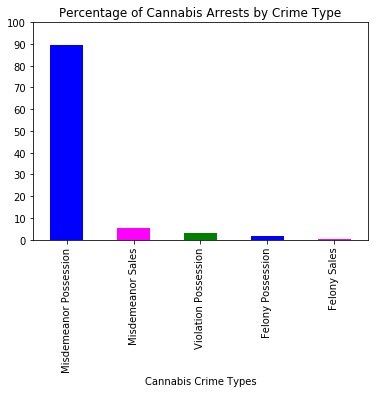

In [23]:
crime_types.plot(kind='bar', title='Percentage of Cannabis Arrests by Crime Type', ylim=(0, 100),
                      yticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                      color=['blue', 'magenta', 'green'])
plt.xlabel('Cannabis Crime Types')
plt.show()

As a side note, violations are less serious than misdemeanor charges, as they only involve fines and do not go on one's criminal record; violations have been the primary tool used in cannabis arrests after the recent decriminalization (New York State Penal Law). 

It would be interesting to see whether the racial disparity differs or remains consistent between the five levels of cannabis crime explored in this project. Suspect race value counts are run for each of the five levels of cannabis crime; obviously only those cases with suspect race reported are used. As can be seen below, the same racial disparity largely holds true across all five levels of cannabis crime. More violation possession arrests are made of white perpetrators than of black Hispanic perpetrators, but the difference is only 3%. Also, it should be noted that violation possession charges are the lowest level of cannabis arrests, and that the majority of violation possession charges are still of African-Americans and white Hispanics. More whites are arrested for felony possession charges than black Hispanics and the same amount of whites are arrested for felony sales charges as black Hispanics, but the difference is less than a percentage point and it bears mentioning that the sample size for non-misdemeanor possession charges for cases where the suspect's race is reported are very small.

In [24]:
df = nyc_susp_race_reported

In [25]:
race_reported_misd_poss = df[df.misd_poss == 1]

In [26]:
misd_poss_race = round(race_reported_misd_poss['SUSP_RACE_cleaned'].value_counts(normalize=True),3)*100
misd_poss_race

BLACK                             50.8
WHITE HISPANIC                    27.6
BLACK HISPANIC                    11.1
WHITE                              8.1
ASIAN / PACIFIC ISLANDER           2.1
AMERICAN INDIAN/ALASKAN NATIVE     0.2
Name: SUSP_RACE_cleaned, dtype: float64

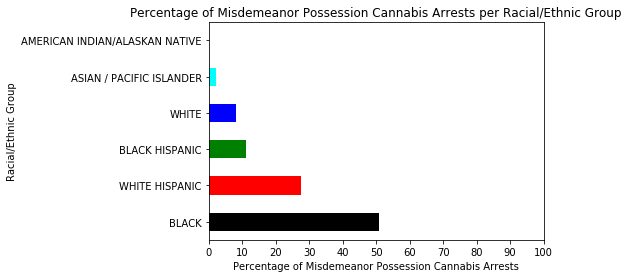

In [27]:
misd_poss_race.plot(kind='barh', title='Percentage of Misdemeanor Possession Cannabis Arrests per Racial/Ethnic Group', 
                    xlim=(0, 100), xticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                    color=['black', 'red', 'green', 'blue', 'cyan', 'magenta'])
plt.xlabel('Percentage of Misdemeanor Possession Cannabis Arrests')
plt.ylabel('Racial/Ethnic Group')
plt.show()

In [28]:
race_reported_viol_poss = df[df.viol_poss == 1]

In [29]:
viol_poss_race = round(race_reported_viol_poss['SUSP_RACE_cleaned'].value_counts(normalize=True),3)*100
viol_poss_race

BLACK                             60.5
WHITE HISPANIC                    20.2
WHITE                              9.7
BLACK HISPANIC                     6.7
ASIAN / PACIFIC ISLANDER           2.4
AMERICAN INDIAN/ALASKAN NATIVE     0.4
Name: SUSP_RACE_cleaned, dtype: float64

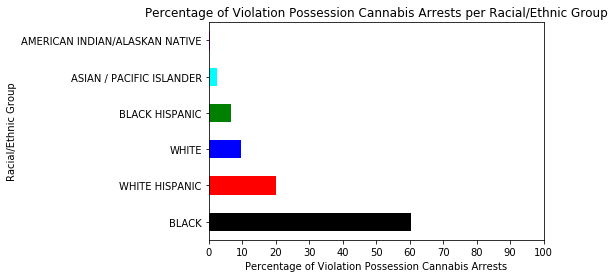

In [30]:
viol_poss_race.plot(kind='barh', title='Percentage of Violation Possession Cannabis Arrests per Racial/Ethnic Group', 
                    xlim=(0, 100), xticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                    color=['black', 'red', 'blue', 'green', 'cyan', 'magenta'])
plt.xlabel('Percentage of Violation Possession Cannabis Arrests')
plt.ylabel('Racial/Ethnic Group')
plt.show()

In [31]:
race_reported_felony_poss = df[df.felony_poss == 1]

In [32]:
felony_poss_race = round(race_reported_felony_poss['SUSP_RACE_cleaned'].value_counts(normalize=True),3)*100
felony_poss_race

BLACK                             46.3
WHITE HISPANIC                    26.2
WHITE                              9.9
BLACK HISPANIC                     9.4
ASIAN / PACIFIC ISLANDER           8.0
AMERICAN INDIAN/ALASKAN NATIVE     0.2
Name: SUSP_RACE_cleaned, dtype: float64

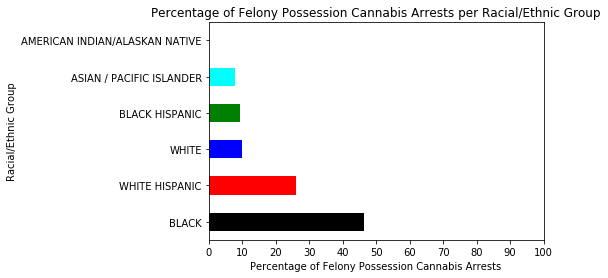

In [33]:
felony_poss_race.plot(kind='barh', title='Percentage of Felony Possession Cannabis Arrests per Racial/Ethnic Group', 
                    xlim=(0, 100), xticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                    color=['black', 'red', 'blue', 'green', 'cyan', 'magenta'])
plt.xlabel('Percentage of Felony Possession Cannabis Arrests')
plt.ylabel('Racial/Ethnic Group')
plt.show()

In [34]:
race_reported_misd_sales = df[df.misd_sales == 1]

In [35]:
misd_sales_race = round(race_reported_misd_sales['SUSP_RACE_cleaned'].value_counts(normalize=True),3)*100
misd_sales_race

BLACK                             52.7
WHITE HISPANIC                    25.8
BLACK HISPANIC                    14.8
WHITE                              3.9
ASIAN / PACIFIC ISLANDER           2.6
AMERICAN INDIAN/ALASKAN NATIVE     0.2
Name: SUSP_RACE_cleaned, dtype: float64

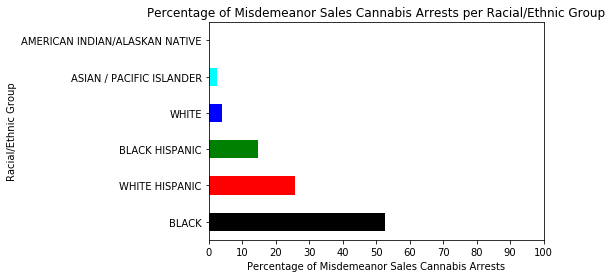

In [36]:
misd_sales_race.plot(kind='barh', title='Percentage of Misdemeanor Sales Cannabis Arrests per Racial/Ethnic Group', 
                    xlim=(0, 100), xticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                    color=['black', 'red', 'green', 'blue', 'cyan', 'magenta'])
plt.xlabel('Percentage of Misdemeanor Sales Cannabis Arrests')
plt.ylabel('Racial/Ethnic Group')
plt.show()

In [37]:
race_reported_felony_sales = df[df.felony_sales == 1]

In [38]:
felony_sales_race = round(race_reported_felony_sales['SUSP_RACE_cleaned'].value_counts(normalize=True),3)*100
felony_sales_race

BLACK                             52.0
WHITE HISPANIC                    27.7
BLACK HISPANIC                     7.4
WHITE                              7.4
ASIAN / PACIFIC ISLANDER           5.0
AMERICAN INDIAN/ALASKAN NATIVE     0.5
Name: SUSP_RACE_cleaned, dtype: float64

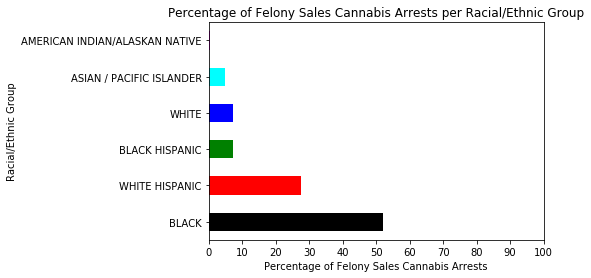

In [39]:
felony_sales_race.plot(kind='barh', title='Percentage of Felony Sales Cannabis Arrests per Racial/Ethnic Group', 
                    xlim=(0, 100), xticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                    color=['black', 'red', 'green', 'blue', 'cyan', 'magenta'])
plt.xlabel('Percentage of Felony Sales Cannabis Arrests')
plt.ylabel('Racial/Ethnic Group')
plt.show()

To look at other indicators of a bias in cannabis arrests in New York City, five DataFrames are first made from the full DataFrame of all cannabis crimes (not just those with suspect race reported), one for each of the cannabis crime types: misdemeanor possession, violation possession, felony possession, misdemeanor sales, and felony sales.

In [40]:
nyc_misd_poss = nyc[nyc.misd_poss == 1]

In [41]:
nyc_viol_poss = nyc[nyc.viol_poss == 1]

In [42]:
nyc_felony_poss = nyc[nyc.felony_poss == 1]

In [43]:
nyc_misd_sales = nyc[nyc.misd_sales == 1]

In [44]:
nyc_felony_sales = nyc[nyc.felony_sales == 1]

The concentration of cannabis arrests in different parts of New York City can help us identify possible sources of bias in how different New Yorkers are arrested. The most fundamental geographic measurement in the NYPD's dataset is latitude and longitude, which is visualized in a scatter plot of cannabis arrests below. The visual concentration of arrests in certain parts of the city will help us partially infer race in the overall DataFrame where only 16% of cases have suspect race reported, due to the concentration of different demographic populations in different parts of the city.

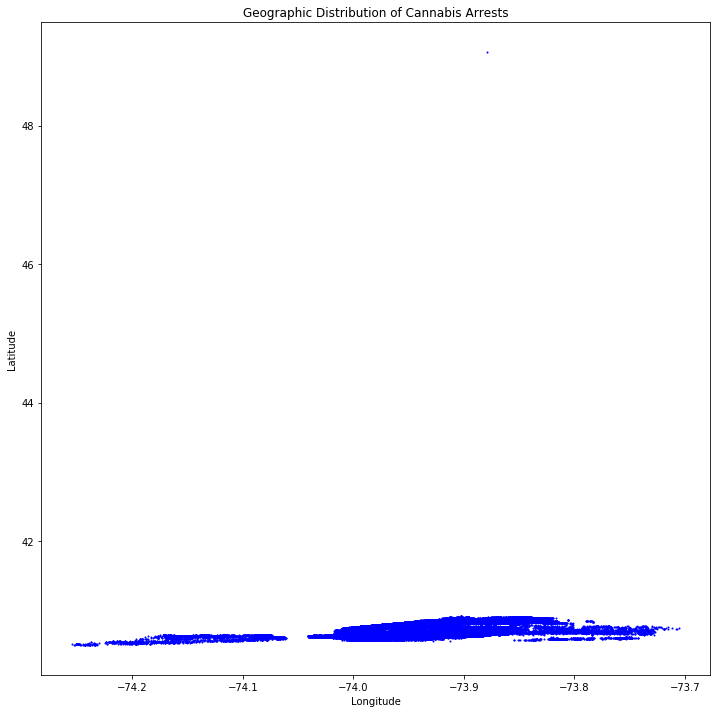

In [45]:
ax = nyc.plot(x='Longitude', y='Latitude', kind='scatter', figsize=(12, 12), c='b', s=1, title='Geographic Distribution of Cannabis Arrests')
plt.show()

Unfortunately, there looks to be a case with an outlier with erroneous Latitude that needs to be removed before a proper scatterplot can be run.

In [46]:
Lat_outlier = (nyc.Latitude > 48)

In [47]:
nyc['Lat_outlier'] = Lat_outlier.astype(int)

In [48]:
nyc.query('Lat_outlier == 1')

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,HADEVELOPT,X_COORD_CD,Y_COORD_CD,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,possession,sales,misdemeanor,violation,felony,misd_poss,viol_poss,felony_poss,misd_sales,viol_sales,felony_sales,date_time_start,date_time_end,day_tw,night_tw,early_morn,morn_rush_hr,work_day,lunch_hr,eve_rush_hr,dinner,evening,late_night,wtc_taxi,wtc_crow,nyse_taxi,nyse_crow,bk_bridge_taxi,bk_bridge_crow,city_hall_taxi,city_hall_crow,manh_bridge_taxi,manh_bridge_crow,will_bridge_taxi,will_bridge_crow,wash_sq_park_taxi,wash_sq_park_crow,union_sq_taxi,union_sq_crow,penn_station_taxi,penn_station_crow,times_sq_taxi,times_sq_crow,rock_center_taxi,rock_center_crow,empire_st_bldg_taxi,empire_st_bldg_crow,lincoln_ctr_taxi,lincoln_ctr_crow,central_pk_taxi,central_pk_crow,apollo_th_taxi,apollo_th_crow,yankee_stad_taxi,yankee_stad_crow,mets_stad_taxi,mets_stad_crow,queens_taxi,queens_crow,prospect_pk_taxi,prospect_pk_crow,downtown_bk_taxi,downtown_bk_crow,si_ferry_taxi,si_ferry_crow,port_authority_taxi,port_authority_crow,nypd_hq_taxi,nypd_hq_crow,mdc_taxi,mdc_crow,rikers_taxi,rikers_crow,nysc_taxi,nysc_crow,duration,start_year,start_month,start_day,new_years_day,new_years_eve,christmas_eve,christmas,july_4th,valentines,halloween,st_patricks,mlk,pres,easter,diwali,pr_parade,yomkippur,rosh_hashanah,eid_al_fitr,eid_al_adha,hannukkah,memorial_day,labor_day,thanksgiving,SUSP_AGE_GROUP_cleaned,SUSP_RACE_cleaned,SUSP_SEX_cleaned,VIC_AGE_GROUP_cleaned,VIC_RACE_cleaned,VIC_SEX_cleaned,PD_CD_recoded,Lat_outlier
4308000,640823466,02/21/2010,19:30:00,02/21/2010,19:31:00,52.0,02/21/2010,235,DANGEROUS DRUGS,567,"MARIJUANA, POSSESSION 4 & 5",COMPLETED,MISDEMEANOR,BRONX,unknown,STREET,N.Y. POLICE DEPT,not_housing_devpt_crime,1013626.0,3253434.0,not_transit_related,49.061308,-73.878793,"(49.061307728, -73.878793089)",PATROL BORO BRONX,not_transit_related,1,0,1,0,0,1,0,0,0,0,0,2010-02-21 19:30:00,2010-02-21 19:31:00,0,1,0,0,0,0,0,1,0,0,8.483215,8.349693,8.486903,8.355481,8.473315,8.356042,8.475815,8.349478,8.465815,8.354559,8.441315,8.348233,8.449015,8.331351,8.437715,8.326165,8.425415,8.311499,8.408015,8.302981,8.402515,8.303209,8.419815,8.313595,8.393515,8.289469,8.365015,8.278861,8.322615,8.251616,8.279115,8.231844,8.339701,8.306674,8.417001,8.33353,8.491315,8.401592,8.470915,8.365876,8.755029,8.486671,8.416115,8.304863,8.473107,8.350179,8.468515,8.345232,8.275415,8.268211,8.470115,8.347817,0 days 00:01:00.000000000,2010,2,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unknown,unknown,unknown,unknown,unknown,unknown,Misdemeanor Possession,1


The following cell double-checks that there is only case with the complaint number in question.

In [49]:
nyc.query('CMPLNT_NUM == 640823466')

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,HADEVELOPT,X_COORD_CD,Y_COORD_CD,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,possession,sales,misdemeanor,violation,felony,misd_poss,viol_poss,felony_poss,misd_sales,viol_sales,felony_sales,date_time_start,date_time_end,day_tw,night_tw,early_morn,morn_rush_hr,work_day,lunch_hr,eve_rush_hr,dinner,evening,late_night,wtc_taxi,wtc_crow,nyse_taxi,nyse_crow,bk_bridge_taxi,bk_bridge_crow,city_hall_taxi,city_hall_crow,manh_bridge_taxi,manh_bridge_crow,will_bridge_taxi,will_bridge_crow,wash_sq_park_taxi,wash_sq_park_crow,union_sq_taxi,union_sq_crow,penn_station_taxi,penn_station_crow,times_sq_taxi,times_sq_crow,rock_center_taxi,rock_center_crow,empire_st_bldg_taxi,empire_st_bldg_crow,lincoln_ctr_taxi,lincoln_ctr_crow,central_pk_taxi,central_pk_crow,apollo_th_taxi,apollo_th_crow,yankee_stad_taxi,yankee_stad_crow,mets_stad_taxi,mets_stad_crow,queens_taxi,queens_crow,prospect_pk_taxi,prospect_pk_crow,downtown_bk_taxi,downtown_bk_crow,si_ferry_taxi,si_ferry_crow,port_authority_taxi,port_authority_crow,nypd_hq_taxi,nypd_hq_crow,mdc_taxi,mdc_crow,rikers_taxi,rikers_crow,nysc_taxi,nysc_crow,duration,start_year,start_month,start_day,new_years_day,new_years_eve,christmas_eve,christmas,july_4th,valentines,halloween,st_patricks,mlk,pres,easter,diwali,pr_parade,yomkippur,rosh_hashanah,eid_al_fitr,eid_al_adha,hannukkah,memorial_day,labor_day,thanksgiving,SUSP_AGE_GROUP_cleaned,SUSP_RACE_cleaned,SUSP_SEX_cleaned,VIC_AGE_GROUP_cleaned,VIC_RACE_cleaned,VIC_SEX_cleaned,PD_CD_recoded,Lat_outlier
4308000,640823466,02/21/2010,19:30:00,02/21/2010,19:31:00,52.0,02/21/2010,235,DANGEROUS DRUGS,567,"MARIJUANA, POSSESSION 4 & 5",COMPLETED,MISDEMEANOR,BRONX,unknown,STREET,N.Y. POLICE DEPT,not_housing_devpt_crime,1013626.0,3253434.0,not_transit_related,49.061308,-73.878793,"(49.061307728, -73.878793089)",PATROL BORO BRONX,not_transit_related,1,0,1,0,0,1,0,0,0,0,0,2010-02-21 19:30:00,2010-02-21 19:31:00,0,1,0,0,0,0,0,1,0,0,8.483215,8.349693,8.486903,8.355481,8.473315,8.356042,8.475815,8.349478,8.465815,8.354559,8.441315,8.348233,8.449015,8.331351,8.437715,8.326165,8.425415,8.311499,8.408015,8.302981,8.402515,8.303209,8.419815,8.313595,8.393515,8.289469,8.365015,8.278861,8.322615,8.251616,8.279115,8.231844,8.339701,8.306674,8.417001,8.33353,8.491315,8.401592,8.470915,8.365876,8.755029,8.486671,8.416115,8.304863,8.473107,8.350179,8.468515,8.345232,8.275415,8.268211,8.470115,8.347817,0 days 00:01:00.000000000,2010,2,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unknown,unknown,unknown,unknown,unknown,unknown,Misdemeanor Possession,1


In [50]:
nyc.drop(nyc[nyc.CMPLNT_NUM == 640823466].index, inplace=True)

The following cells double-check that just the case in question is dropped.

In [51]:
nyc.query('CMPLNT_NUM == 640823466')

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,HADEVELOPT,X_COORD_CD,Y_COORD_CD,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,possession,sales,misdemeanor,violation,felony,misd_poss,viol_poss,felony_poss,misd_sales,viol_sales,felony_sales,date_time_start,date_time_end,day_tw,night_tw,early_morn,morn_rush_hr,work_day,lunch_hr,eve_rush_hr,dinner,evening,late_night,wtc_taxi,wtc_crow,nyse_taxi,nyse_crow,bk_bridge_taxi,bk_bridge_crow,city_hall_taxi,city_hall_crow,manh_bridge_taxi,manh_bridge_crow,will_bridge_taxi,will_bridge_crow,wash_sq_park_taxi,wash_sq_park_crow,union_sq_taxi,union_sq_crow,penn_station_taxi,penn_station_crow,times_sq_taxi,times_sq_crow,rock_center_taxi,rock_center_crow,empire_st_bldg_taxi,empire_st_bldg_crow,lincoln_ctr_taxi,lincoln_ctr_crow,central_pk_taxi,central_pk_crow,apollo_th_taxi,apollo_th_crow,yankee_stad_taxi,yankee_stad_crow,mets_stad_taxi,mets_stad_crow,queens_taxi,queens_crow,prospect_pk_taxi,prospect_pk_crow,downtown_bk_taxi,downtown_bk_crow,si_ferry_taxi,si_ferry_crow,port_authority_taxi,port_authority_crow,nypd_hq_taxi,nypd_hq_crow,mdc_taxi,mdc_crow,rikers_taxi,rikers_crow,nysc_taxi,nysc_crow,duration,start_year,start_month,start_day,new_years_day,new_years_eve,christmas_eve,christmas,july_4th,valentines,halloween,st_patricks,mlk,pres,easter,diwali,pr_parade,yomkippur,rosh_hashanah,eid_al_fitr,eid_al_adha,hannukkah,memorial_day,labor_day,thanksgiving,SUSP_AGE_GROUP_cleaned,SUSP_RACE_cleaned,SUSP_SEX_cleaned,VIC_AGE_GROUP_cleaned,VIC_RACE_cleaned,VIC_SEX_cleaned,PD_CD_recoded,Lat_outlier


In [52]:
nyc.shape

(220304, 134)

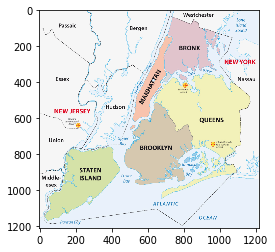

In [53]:
im = plt.imread("map_of_nyc.png")
implot = plt.imshow(im)

In [ ]:
#nyc['color'] = ['r']*len(nyc)
#nyc['color'][0] = 'b'

Now that the geographic outlier has been removed, one can see the geographic distribution of overall cannabis arrests in New York City. Arrests are greatly concentrated in greater numbers in Manhattan, the Bronx, and Central and to a lesser degree Southern Brooklyn.

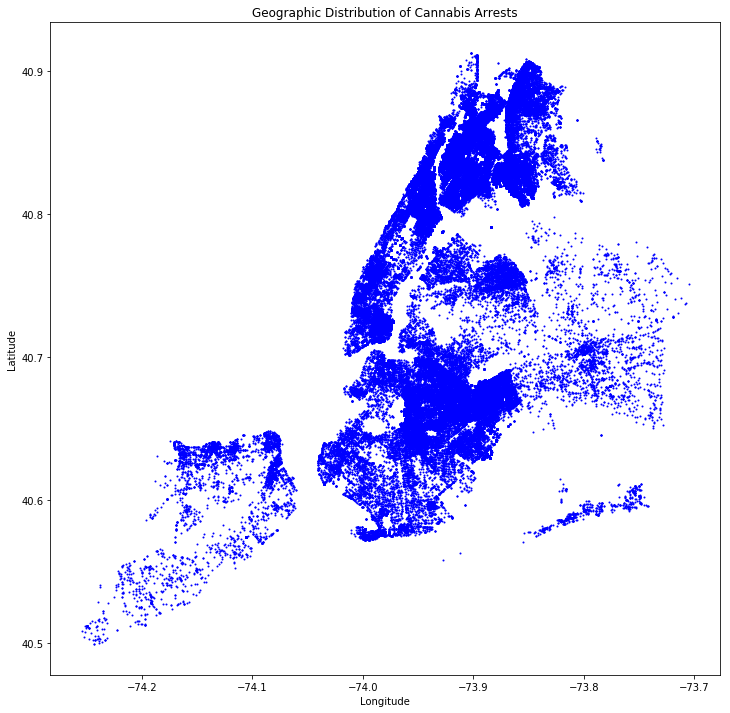

In [54]:
ax = nyc.plot(x='Longitude', y='Latitude', kind='scatter', figsize=(12, 12), c='b', s=1, title='Geographic Distribution of Cannabis Arrests')

It would be interesting to see this scatter-plot/map of cannabis arrests for the five crime types. The outlier that was dropped was a misdemeanor possession crime, so that is dropped from the subsetted misdemeanor possession DataFrame as well before the scatter plot is run.

In [55]:
nyc_misd_poss.drop(nyc_misd_poss[nyc_misd_poss.CMPLNT_NUM == 640823466].index, inplace=True)

/Users/DanLoew/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


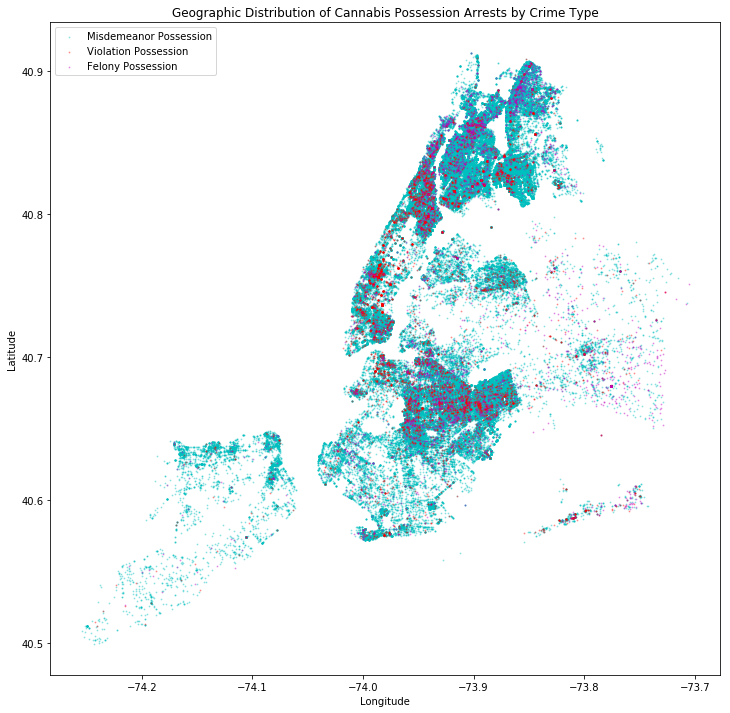

In [56]:
ax = nyc_misd_poss.plot(x='Longitude', y='Latitude', kind='scatter', figsize=(12, 12), c='c', s=1, alpha=0.3, title='Geographic Distribution of Cannabis Possession Arrests by Crime Type')
ax = nyc_viol_poss.plot(ax=ax, x='Longitude', y='Latitude', kind='scatter', figsize=(12, 12), c='r', s=1, alpha=0.3)
ax = nyc_felony_poss.plot(ax=ax, x='Longitude', y='Latitude', kind='scatter', figsize=(12, 12), c='m', s=1, alpha=0.3)
plt.legend(('Misdemeanor Possession', 'Violation Possession', 'Felony Possession'), loc='upper left')
plt.show()

As can be seen above, the vast majority of cannabis arrests are for misdemeanor possession, and in Manhattan they are heavily concentrated in the Bronx, Inwood, Washington Heights, and Harlem, which have large populations of African-American and Latino residents. In Brooklyn, arrests are concentrated in neighborhoods like East New York, Cypress Hills, Brownsville, Crown Heights, Flatbush, Bedford-Stuyvesant, and Bushwick. Again, these neighborhoods have large populations of African-American and Latino residents. Violation and felony possesion are peppered throughout, but they are concentrated in the neighborhoods mentioned.  Manhattan, Queens, south and west Brooklyn, and Staten Island have significantly fewer arrests. It bears mentioning that Staten Island is majority white, but the clusters of arrests are centered around housing projects like Stapleton and Park Hill. 

Because sales are so different than simple possession, and for ease of visualization, cannabis sales are visualized separately below. One can see below that these arrests tend to fall within the same neighborhoods as possession arrests.

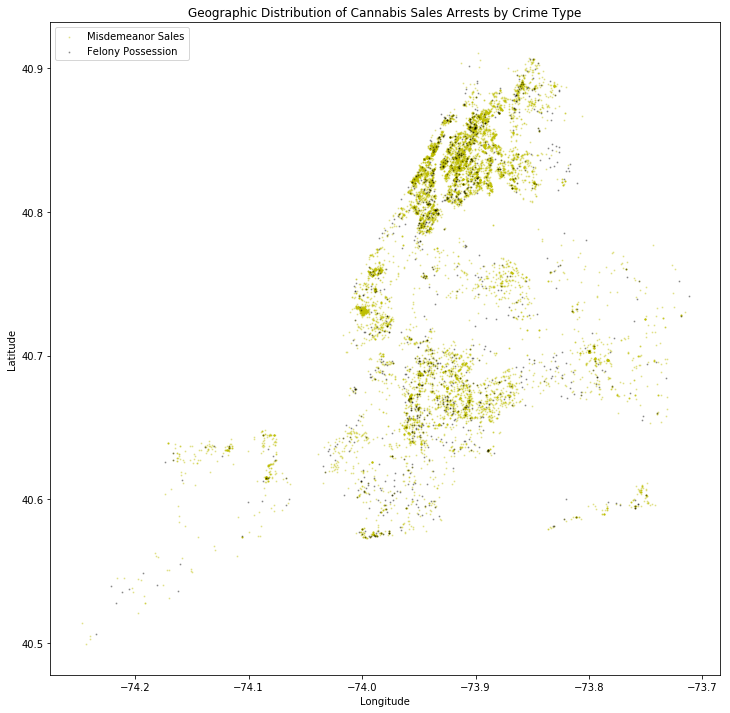

In [57]:
ax = nyc_misd_sales.plot(x='Longitude', y='Latitude', kind='scatter', figsize=(12, 12), c='y', s=1, alpha=0.3, title='Geographic Distribution of Cannabis Sales Arrests by Crime Type')
ax = nyc_felony_sales.plot(ax=ax, x='Longitude', y='Latitude', kind='scatter', figsize=(12, 12), c='k', s=1, alpha=0.3)
plt.legend(('Misdemeanor Sales', 'Felony Possession'), loc='upper left')
plt.show()

The first geographic indicator of New York City is the borough. As can be seen in overall cannabis arrests, the Bronx and Brooklyn are home to the majority of them. This is interesting because of the racial demographics of these two boroughs. The Bronx's populace is 36% black, 48% Latino, and only 14.5% non-Latino white, and Brooklyn's populace is 36% black, 20% Latino, and 36% non-Latino white. By contrast, Manhattan's populace is 16% black, 25% Latino, and 48% non-Latino white. Queens is 19% black, 27% Latino, and 30% non-Latino white; and Staten Island is 11% black, 17% Latino, and 65% non-Latino white (U.S. Census Bureau).

In [58]:
nyc_borough = round(nyc['BORO_NM'].value_counts(normalize=True), 3)*100
nyc_borough

BRONX            39.4
BROOKLYN         32.4
MANHATTAN        21.1
QUEENS            4.4
STATEN ISLAND     2.6
unknown           0.1
Name: BORO_NM, dtype: float64

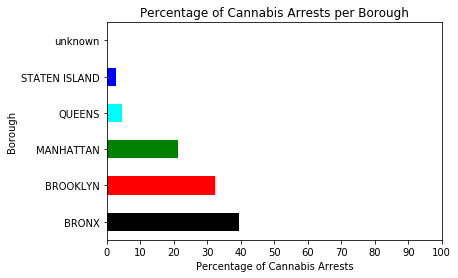

In [59]:
nyc_borough.plot(kind='barh', title='Percentage of Cannabis Arrests per Borough', 
                    xlim=(0, 100), xticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                    color=['black', 'red', 'green', 'cyan', 'blue'])
plt.xlabel('Percentage of Cannabis Arrests')
plt.ylabel('Borough')
plt.show()

In [60]:
misd_poss_nyc_borough = round(nyc_misd_poss['BORO_NM'].value_counts(normalize=True),3)*100
misd_poss_nyc_borough

BRONX            40.3
BROOKLYN         32.9
MANHATTAN        20.4
QUEENS            3.7
STATEN ISLAND     2.6
unknown           0.1
Name: BORO_NM, dtype: float64

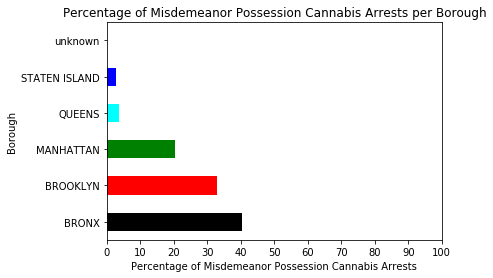

In [61]:
misd_poss_nyc_borough.plot(kind='barh', title='Percentage of Misdemeanor Possession Cannabis Arrests per Borough', 
                    xlim=(0, 100), xticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                    color=['black', 'red', 'green', 'cyan', 'blue'])
plt.xlabel('Percentage of Misdemeanor Possession Cannabis Arrests')
plt.ylabel('Borough')
plt.show()

In [62]:
viol_poss_nyc_borough = round(nyc_viol_poss['BORO_NM'].value_counts(normalize=True),3)*100
viol_poss_nyc_borough

MANHATTAN        35.5
BROOKLYN         34.0
BRONX            20.5
QUEENS            8.8
STATEN ISLAND     1.1
unknown           0.1
Name: BORO_NM, dtype: float64

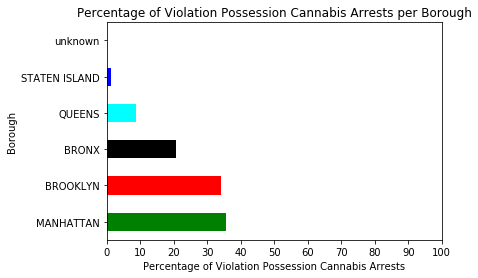

In [63]:
viol_poss_nyc_borough.plot(kind='barh', title='Percentage of Violation Possession Cannabis Arrests per Borough', 
                    xlim=(0, 100), xticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                    color=['green', 'red', 'black', 'cyan', 'blue'])
plt.xlabel('Percentage of Violation Possession Cannabis Arrests')
plt.ylabel('Borough')
plt.show()

In [64]:
felony_poss_nyc_borough = round(nyc_felony_poss['BORO_NM'].value_counts(normalize=True),3)*100
felony_poss_nyc_borough

BRONX            34.1
BROOKLYN         32.8
MANHATTAN        16.1
QUEENS           15.0
STATEN ISLAND     1.9
unknown           0.1
Name: BORO_NM, dtype: float64

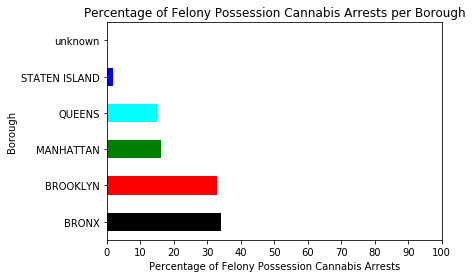

In [65]:
felony_poss_nyc_borough.plot(kind='barh', title='Percentage of Felony Possession Cannabis Arrests per Borough', 
                    xlim=(0, 100), xticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                    color=['black', 'red', 'green', 'cyan', 'blue'])
plt.xlabel('Percentage of Felony Possession Cannabis Arrests')
plt.ylabel('Borough')
plt.show()

Notice how misdemeanor and felony possession charges are dominant in the Bronx and Brooklyn, while violation possession charges (lowest level) are dominant in Manhattan. This reflects the evidence that cannabis crimes are punished very differently in New York City dependent on which part of the city the crime takes place in.

In [66]:
misd_sales_nyc_borough = round(nyc_misd_sales['BORO_NM'].value_counts(normalize=True),3)*100
misd_sales_nyc_borough

BRONX            38.5
MANHATTAN        27.3
BROOKLYN         22.2
QUEENS            8.7
STATEN ISLAND     3.2
unknown           0.1
Name: BORO_NM, dtype: float64

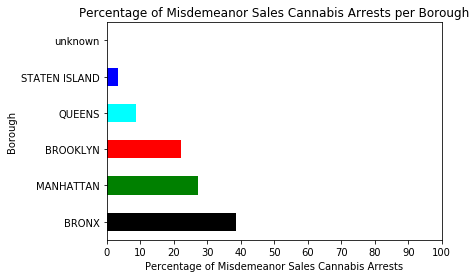

In [67]:
misd_sales_nyc_borough.plot(kind='barh', title='Percentage of Misdemeanor Sales Cannabis Arrests per Borough', 
                    xlim=(0, 100), xticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                    color=['black', 'green', 'red', 'cyan', 'blue'])
plt.xlabel('Percentage of Misdemeanor Sales Cannabis Arrests')
plt.ylabel('Borough')
plt.show()

Interestingly, Manhattan is second to the Bronx for misdemeanor sales arrests. It would be interesting to see which neighborhoods of Manhattan are responsible for this.

In [68]:
felony_sales_nyc_borough = round(nyc_felony_sales['BORO_NM'].value_counts(normalize=True), 3)*100
felony_sales_nyc_borough

BROOKLYN         34.1
BRONX            30.0
MANHATTAN        20.0
QUEENS           12.9
STATEN ISLAND     2.9
unknown           0.2
Name: BORO_NM, dtype: float64

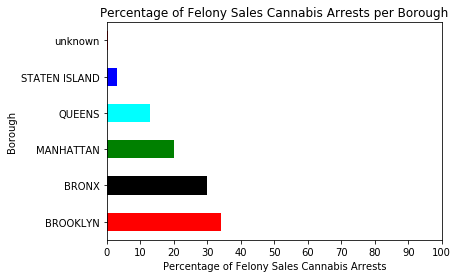

In [69]:
felony_sales_nyc_borough.plot(kind='barh', title='Percentage of Felony Sales Cannabis Arrests per Borough', 
                    xlim=(0, 100), xticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                    color=['red', 'black', 'green', 'cyan', 'blue'])
plt.xlabel('Percentage of Felony Sales Cannabis Arrests')
plt.ylabel('Borough')
plt.show()

Brooklyn and the Bronx predominate for felony sales; again, it would be interesting to see which neighborhoods are responsible for these arrests. Police precincts offer a route to explore these smaller geographic zones.

Unfortunately, the precinct data was unlabeled in the dataset downloaded from the NYC Open Data project. However, after consulting the NYPD's website (https://www1.nyc.gov/site/nypd/bureaus/patrol/precincts-landing.page), I can say that the top 10 precinct arrests are:

43rd Precinct - Southeastern Bronx

75th Precinct - Easternmost Brooklyn (East New York and Cypress Hills)

44th Precinct - Southwestern Bronx

73rd Precinct - Northeastern Brooklyn (Brownsville and Ocean Hill)

46th Precinct - Central West Bronx (Fordham, University Heights, Morris Heights and Mount Hope)

40th Precinct - Southernmost Bronx (Port Morris, Mott Haven, and Melrose)

47th Precinct - Northern Bronx (Woodlawn, Wakefield, Williamsbridge, Baychester, Edenwald, Olinville, Fishbay, and Woodlawn Cemetary)

52nd Precinct - Northern Bronx section (Bedford Park, Fordham, Kingsbridge, Norwood, Bronx Park, and University Heights)

42nd Precinct - Morrisania section of the Bronx (Claremont, Crotona Park East, and Crotona Park)

67th Precinct - Central Brooklyn (East Flatbush and Remsen Village)

As can be seen, the top 10 police precincts with the highest amounts of cannabis arrests are all in the Bronx and Brooklyn. The demographics in these neighborhoods reflects the racial disparity seen in cannabis arrests.

There is also a Patrol Borough feature, as the NYPD splits the boroughs up into a few different patrol boroughs. Value counts for Patrol Borough are included after each precinct code value count call for supportive purposes.

In [70]:
round(nyc['ADDR_PCT_CD'].value_counts(normalize=True), 3)*100

43.0     7.5
75.0     7.1
44.0     5.6
73.0     4.6
46.0     4.4
40.0     4.3
47.0     4.3
52.0     4.1
42.0     3.5
67.0     2.8
77.0     2.8
23.0     2.5
32.0     2.5
30.0     2.4
71.0     2.3
120.0    1.8
25.0     1.8
81.0     1.8
48.0     1.7
70.0     1.4
60.0     1.4
41.0     1.3
49.0     1.3
115.0    1.3
69.0     1.2
18.0     1.2
6.0      1.2
28.0     1.1
79.0     1.1
9.0      1.0
        ... 
83.0     0.4
62.0     0.4
103.0    0.4
122.0    0.3
66.0     0.3
13.0     0.3
110.0    0.3
1.0      0.3
5.0      0.3
72.0     0.3
22.0     0.3
108.0    0.2
104.0    0.2
100.0    0.2
113.0    0.2
20.0     0.2
121.0    0.2
78.0     0.2
123.0    0.2
19.0     0.2
17.0     0.2
106.0    0.1
101.0    0.1
94.0     0.1
105.0    0.1
111.0    0.1
107.0    0.1
109.0    0.1
102.0    0.1
112.0    0.1
Name: ADDR_PCT_CD, Length: 77, dtype: float64

In [71]:
round(nyc['PATROL_BORO'].value_counts(normalize=True), 3)*100

PATROL BORO BRONX            39.5
PATROL BORO BKLYN NORTH      19.8
PATROL BORO MAN NORTH        14.1
PATROL BORO BKLYN SOUTH      12.6
PATROL BORO MAN SOUTH         7.1
PATROL BORO QUEENS NORTH      3.1
PATROL BORO STATEN ISLAND     2.6
PATROL BORO QUEENS SOUTH      1.3
unknown                       0.0
Name: PATROL_BORO, dtype: float64

The only difference for the DataFrame of just misdemeanor possession charges is that the 77th precinct takes the 10th place spot. This precinct is found in the northern section of the Crown Heighs neighborhood of Brooklyn, an area mostly occupied by African-Americans of Caribbean descent.

In [72]:
round(nyc_misd_poss['ADDR_PCT_CD'].value_counts(normalize=True), 3)*100

43.0     7.9
75.0     7.4
44.0     5.7
73.0     4.7
46.0     4.5
40.0     4.4
47.0     4.3
52.0     4.1
42.0     3.6
77.0     2.9
67.0     2.9
23.0     2.6
32.0     2.5
30.0     2.4
71.0     2.3
120.0    1.9
81.0     1.8
25.0     1.8
48.0     1.6
70.0     1.4
60.0     1.4
49.0     1.3
69.0     1.2
115.0    1.2
41.0     1.2
18.0     1.2
28.0     1.1
7.0      1.1
9.0      1.0
79.0     1.0
        ... 
122.0    0.3
62.0     0.3
66.0     0.3
83.0     0.3
22.0     0.3
5.0      0.3
1.0      0.3
110.0    0.3
103.0    0.2
72.0     0.2
121.0    0.2
13.0     0.2
104.0    0.2
108.0    0.2
20.0     0.2
123.0    0.2
78.0     0.2
100.0    0.2
17.0     0.2
19.0     0.1
94.0     0.1
113.0    0.1
106.0    0.1
111.0    0.1
107.0    0.1
109.0    0.1
101.0    0.1
102.0    0.1
105.0    0.1
112.0    0.0
Name: ADDR_PCT_CD, Length: 77, dtype: float64

In [73]:
round(nyc_misd_poss['PATROL_BORO'].value_counts(normalize=True), 3)*100

PATROL BORO BRONX            40.3
PATROL BORO BKLYN NORTH      20.3
PATROL BORO MAN NORTH        13.8
PATROL BORO BKLYN SOUTH      12.7
PATROL BORO MAN SOUTH         6.6
PATROL BORO QUEENS NORTH      2.9
PATROL BORO STATEN ISLAND     2.6
PATROL BORO QUEENS SOUTH      0.9
unknown                       0.0
Name: PATROL_BORO, dtype: float64

As reflected above, the precinct with the most violation possession charges (the 14th) is in Manhattan in Midtown South, which encompasses the Port Authority Bus Terminal, Penn Station, and Times Square. This finding is also shown in the fact that the station with the largest amount of transit-related cannabis arrests is the Port Authority Bus Terminal. This is an interesting finding, as one could assume that the historically African-American neighborhood of Harlem would be most heavily policed for cannabis arrests. The other two Manhattan precincts (the 13th and the 18th) in the top 10 for violation possession are also in Midtown. The 71st precinct is in central Brooklyn, encompassing the southern portion of Crown Heights, Wingate, and Prospect Lefferts.

In [74]:
round(nyc_viol_poss['ADDR_PCT_CD'].value_counts(normalize=True), 3)*100

14.0     6.8
75.0     5.9
73.0     4.3
40.0     3.7
43.0     3.6
71.0     3.2
13.0     3.1
25.0     2.9
18.0     2.8
67.0     2.6
32.0     2.5
47.0     2.4
77.0     2.1
81.0     1.9
84.0     1.8
30.0     1.8
23.0     1.8
79.0     1.7
41.0     1.6
115.0    1.6
52.0     1.5
28.0     1.5
44.0     1.4
49.0     1.4
48.0     1.4
88.0     1.4
24.0     1.3
46.0     1.3
100.0    1.2
9.0      1.2
        ... 
34.0     0.8
1.0      0.7
19.0     0.6
62.0     0.6
61.0     0.6
120.0    0.6
108.0    0.6
78.0     0.6
17.0     0.5
68.0     0.5
5.0      0.5
72.0     0.5
110.0    0.5
101.0    0.4
109.0    0.4
94.0     0.3
106.0    0.3
50.0     0.3
83.0     0.3
122.0    0.3
104.0    0.3
22.0     0.3
111.0    0.2
107.0    0.2
102.0    0.2
112.0    0.2
66.0     0.2
123.0    0.1
105.0    0.1
121.0    0.1
Name: ADDR_PCT_CD, Length: 77, dtype: float64

In [75]:
round(nyc_viol_poss['PATROL_BORO'].value_counts(normalize=True), 3)*100

PATROL BORO BRONX            20.5
PATROL BORO BKLYN NORTH      20.4
PATROL BORO MAN SOUTH        18.8
PATROL BORO MAN NORTH        16.6
PATROL BORO BKLYN SOUTH      13.6
PATROL BORO QUEENS NORTH      4.8
PATROL BORO QUEENS SOUTH      4.1
PATROL BORO STATEN ISLAND     1.1
Name: PATROL_BORO, dtype: float64

In [76]:
round(nyc_viol_poss['STATION_NAME'].value_counts(normalize=True), 3)*100

not_transit_related               67.4
42 ST.-PORT AUTHORITY BUS TERM     3.4
125 STREET                         1.4
42 ST.-TIMES SQUARE                1.2
59 ST.-COLUMBUS CIRCLE             1.0
3 AVENUE-149 STREET                0.9
14 STREET                          0.9
116 STREET                         0.8
SIMPSON STREET                     0.6
UNION SQUARE                       0.5
EAST 180 STREET                    0.5
GUN HILL ROAD                      0.5
34 ST.-PENN STATION                0.5
EAST 174 STREET                    0.5
PROSPECT AVENUE                    0.4
42 ST.-GRAND CENTRAL               0.4
PELHAM PKWY.                       0.4
241 ST.-WAKEFIELD                  0.4
3 AVENUE-138 STREET                0.4
28 STREET                          0.4
1 AVENUE                           0.3
HUNTS POINT AVENUE                 0.3
86 STREET                          0.3
14 ST.-UNION SQUARE                0.3
EAST TREMONT AVE.-WEST FARMS S     0.3
59 STREET                

The only newcomers in felony possession are the 113th and the 34th. The 113th is in Jamaica, Queens, and the 34th is Washington Heights and Inwood, two neighborhoods north of Harlem in Manhattan. Both of these neighborhoods have a predominantly African-American and Latino population.

In [77]:
round(nyc_felony_poss['ADDR_PCT_CD'].value_counts(normalize=True), 3)*100

47.0     10.0
75.0      4.5
52.0      4.4
67.0      4.1
46.0      4.0
44.0      3.4
113.0     3.0
73.0      2.8
34.0      2.4
77.0      2.3
79.0      2.2
71.0      2.2
33.0      1.9
48.0      1.9
69.0      1.9
32.0      1.9
43.0      1.8
45.0      1.8
81.0      1.7
105.0     1.7
40.0      1.6
114.0     1.5
50.0      1.4
23.0      1.4
25.0      1.4
70.0      1.3
41.0      1.3
68.0      1.3
103.0     1.3
42.0      1.3
         ... 
9.0       0.6
72.0      0.6
61.0      0.6
76.0      0.6
108.0     0.5
88.0      0.5
14.0      0.5
122.0     0.5
110.0     0.5
1.0       0.4
13.0      0.4
84.0      0.4
100.0     0.4
66.0      0.3
94.0      0.3
112.0     0.3
26.0      0.3
102.0     0.3
24.0      0.2
111.0     0.2
19.0      0.2
20.0      0.2
123.0     0.2
5.0       0.2
6.0       0.2
17.0      0.2
18.0      0.2
78.0      0.1
121.0     0.1
22.0      0.1
Name: ADDR_PCT_CD, Length: 77, dtype: float64

In [78]:
round(nyc_felony_poss['PATROL_BORO'].value_counts(normalize=True), 3)*100

PATROL BORO BRONX            34.2
PATROL BORO BKLYN NORTH      17.0
PATROL BORO BKLYN SOUTH      15.9
PATROL BORO MAN NORTH        11.7
PATROL BORO QUEENS SOUTH      9.4
PATROL BORO QUEENS NORTH      5.6
PATROL BORO MAN SOUTH         4.3
PATROL BORO STATEN ISLAND     1.9
Name: PATROL_BORO, dtype: float64

For misdemeanor sales, newcomer precincts are the 6th and the 30th. The 6th encompasses Greenwich Village and the West Village, and the 30th is Western Harlem.

In [79]:
round(nyc_misd_sales['ADDR_PCT_CD'].value_counts(normalize=True), 3)*100

44.0     8.7
46.0     5.0
52.0     4.6
6.0      3.9
33.0     3.9
30.0     3.8
43.0     3.8
42.0     3.5
47.0     3.3
73.0     3.2
40.0     2.9
48.0     2.9
75.0     2.8
120.0    2.6
32.0     2.4
23.0     2.3
41.0     2.2
25.0     2.1
103.0    1.8
71.0     1.7
79.0     1.6
67.0     1.6
28.0     1.5
77.0     1.5
34.0     1.4
70.0     1.4
115.0    1.3
83.0     1.3
81.0     1.3
60.0     1.1
        ... 
62.0     0.4
24.0     0.4
68.0     0.4
26.0     0.4
66.0     0.4
84.0     0.3
106.0    0.3
63.0     0.3
88.0     0.3
104.0    0.3
45.0     0.3
107.0    0.3
108.0    0.3
112.0    0.3
122.0    0.3
111.0    0.3
102.0    0.2
100.0    0.2
20.0     0.2
109.0    0.2
19.0     0.2
123.0    0.2
76.0     0.2
94.0     0.2
121.0    0.2
5.0      0.1
1.0      0.1
78.0     0.1
22.0     0.1
17.0     0.1
Name: ADDR_PCT_CD, Length: 77, dtype: float64

In [80]:
round(nyc_misd_sales['PATROL_BORO'].value_counts(normalize=True), 3)*100

PATROL BORO BRONX            38.5
PATROL BORO MAN NORTH        18.7
PATROL BORO BKLYN NORTH      13.1
PATROL BORO BKLYN SOUTH       9.1
PATROL BORO MAN SOUTH         8.7
PATROL BORO QUEENS SOUTH      4.9
PATROL BORO QUEENS NORTH      3.9
PATROL BORO STATEN ISLAND     3.2
Name: PATROL_BORO, dtype: float64

For felony sales, the 79th and 25th precincts are newcomers to the top 10 list. They are the Bedford-Stuyvesant neighborhood of Brooklyn and East Harlem. Again, both of these neighborhoods have a predominantly African-American and Latino population.

In [81]:
round(nyc_felony_sales['ADDR_PCT_CD'].value_counts(normalize=True), 3)*100

46.0     4.5
47.0     4.4
40.0     4.4
44.0     4.3
67.0     3.5
71.0     3.1
52.0     2.7
34.0     2.5
79.0     2.4
25.0     2.4
75.0     2.4
62.0     2.3
32.0     2.3
42.0     2.3
43.0     2.2
60.0     2.2
61.0     2.1
23.0     2.1
73.0     1.9
45.0     1.9
77.0     1.8
102.0    1.6
69.0     1.5
81.0     1.5
70.0     1.4
120.0    1.3
114.0    1.3
106.0    1.3
30.0     1.3
90.0     1.3
        ... 
9.0      0.8
10.0     0.8
84.0     0.7
88.0     0.7
63.0     0.7
105.0    0.7
109.0    0.7
48.0     0.7
123.0    0.7
122.0    0.6
26.0     0.6
7.0      0.6
20.0     0.5
66.0     0.5
24.0     0.5
112.0    0.5
49.0     0.5
110.0    0.5
100.0    0.4
108.0    0.4
111.0    0.4
107.0    0.4
13.0     0.4
5.0      0.4
18.0     0.4
1.0      0.3
6.0      0.2
121.0    0.2
94.0     0.2
22.0     0.1
Name: ADDR_PCT_CD, Length: 75, dtype: float64

In [82]:
round(nyc_felony_sales['PATROL_BORO'].value_counts(normalize=True), 3)*100

PATROL BORO BRONX            30.0
PATROL BORO BKLYN SOUTH      20.1
PATROL BORO MAN NORTH        15.4
PATROL BORO BKLYN NORTH      14.1
PATROL BORO QUEENS SOUTH      7.0
PATROL BORO QUEENS NORTH      5.9
PATROL BORO MAN SOUTH         4.6
PATROL BORO STATEN ISLAND     2.9
Name: PATROL_BORO, dtype: float64

An intriguing part of the NYPD dataset is a feature that describes the premises type that the arrest occurred in. As can be seen below, the majority of cannabis arrests happen either on the street or in the New York City housing projects. Violation possession charges also occur in the New York City subway system.

In [83]:
round(nyc['PREM_TYP_DESC'].value_counts(normalize=True), 3)*100

STREET                          57.9
RESIDENCE - PUBLIC HOUSING      19.1
RESIDENCE - APT. HOUSE           7.8
PARK/PLAYGROUND                  5.9
OTHER                            2.4
TRANSIT - NYC SUBWAY             1.6
PUBLIC BUILDING                  1.0
RESIDENCE-HOUSE                  1.0
unknown                          0.8
PARKING LOT/GARAGE (PUBLIC)      0.5
GROCERY/BODEGA                   0.3
PUBLIC SCHOOL                    0.3
OPEN AREAS (OPEN LOTS)           0.3
PARKING LOT/GARAGE (PRIVATE)     0.1
BAR/NIGHT CLUB                   0.1
COMMERCIAL BUILDING              0.1
MARINA/PIER                      0.1
HIGHWAY/PARKWAY                  0.1
TAXI (LIVERY LICENSED)           0.1
FAST FOOD                        0.1
TUNNEL                           0.1
RESTAURANT/DINER                 0.0
AIRPORT TERMINAL                 0.0
STORE UNCLASSIFIED               0.0
CANDY STORE                      0.0
HOSPITAL                         0.0
BUS TERMINAL                     0.0
G

In [84]:
round(nyc_misd_poss['PREM_TYP_DESC'].value_counts(normalize=True), 3)*100

STREET                          57.9
RESIDENCE - PUBLIC HOUSING      20.2
RESIDENCE - APT. HOUSE           7.8
PARK/PLAYGROUND                  6.2
OTHER                            2.4
PUBLIC BUILDING                  1.1
RESIDENCE-HOUSE                  0.9
unknown                          0.8
TRANSIT - NYC SUBWAY             0.6
PARKING LOT/GARAGE (PUBLIC)      0.5
OPEN AREAS (OPEN LOTS)           0.3
GROCERY/BODEGA                   0.2
PUBLIC SCHOOL                    0.2
PARKING LOT/GARAGE (PRIVATE)     0.1
MARINA/PIER                      0.1
BAR/NIGHT CLUB                   0.1
COMMERCIAL BUILDING              0.1
HIGHWAY/PARKWAY                  0.1
TAXI (LIVERY LICENSED)           0.0
TUNNEL                           0.0
RESTAURANT/DINER                 0.0
FAST FOOD                        0.0
BUS TERMINAL                     0.0
STORE UNCLASSIFIED               0.0
CANDY STORE                      0.0
BUS STOP                         0.0
GAS STATION                      0.0
H

In [85]:
round(nyc_viol_poss['PREM_TYP_DESC'].value_counts(normalize=True), 3)*100

STREET                          36.4
TRANSIT - NYC SUBWAY            32.0
RESIDENCE - PUBLIC HOUSING      11.3
RESIDENCE - APT. HOUSE           5.6
PARK/PLAYGROUND                  3.0
OTHER                            2.9
PUBLIC SCHOOL                    1.8
PUBLIC BUILDING                  1.1
RESIDENCE-HOUSE                  1.0
unknown                          0.7
AIRPORT TERMINAL                 0.6
BUS (NYC TRANSIT)                0.5
HOSPITAL                         0.3
TRANSIT FACILITY (OTHER)         0.3
GROCERY/BODEGA                   0.3
PARKING LOT/GARAGE (PUBLIC)      0.2
COMMERCIAL BUILDING              0.2
TUNNEL                           0.2
BAR/NIGHT CLUB                   0.2
HIGHWAY/PARKWAY                  0.1
PARKING LOT/GARAGE (PRIVATE)     0.1
BUS TERMINAL                     0.1
BRIDGE                           0.1
CANDY STORE                      0.1
BUS STOP                         0.1
DEPARTMENT STORE                 0.1
GAS STATION                      0.1
F

In [86]:
round(nyc_felony_poss['PREM_TYP_DESC'].value_counts(normalize=True), 3)*100

STREET                          61.0
RESIDENCE - APT. HOUSE          15.0
RESIDENCE - PUBLIC HOUSING       7.2
RESIDENCE-HOUSE                  6.6
OTHER                            1.9
unknown                          0.9
TAXI (LIVERY LICENSED)           0.9
AIRPORT TERMINAL                 0.8
PUBLIC BUILDING                  0.6
COMMERCIAL BUILDING              0.5
TRANSIT - NYC SUBWAY             0.5
GROCERY/BODEGA                   0.5
HIGHWAY/PARKWAY                  0.4
PARKING LOT/GARAGE (PUBLIC)      0.4
PARK/PLAYGROUND                  0.3
STORE UNCLASSIFIED               0.3
PARKING LOT/GARAGE (PRIVATE)     0.3
BRIDGE                           0.1
HOTEL/MOTEL                      0.1
GAS STATION                      0.1
VARIETY STORE                    0.1
FAST FOOD                        0.1
RESTAURANT/DINER                 0.1
PRIVATE/PAROCHIAL SCHOOL         0.1
TUNNEL                           0.1
OPEN AREAS (OPEN LOTS)           0.1
SMALL MERCHANT                   0.1
B

In [87]:
round(nyc_misd_sales['PREM_TYP_DESC'].value_counts(normalize=True), 3)*100

STREET                          68.6
RESIDENCE - PUBLIC HOUSING      10.3
RESIDENCE - APT. HOUSE           7.4
PARK/PLAYGROUND                  4.3
OTHER                            2.0
GROCERY/BODEGA                   1.5
RESIDENCE-HOUSE                  1.1
PUBLIC BUILDING                  1.0
unknown                          0.8
TRANSIT - NYC SUBWAY             0.5
PUBLIC SCHOOL                    0.4
FAST FOOD                        0.3
PARKING LOT/GARAGE (PUBLIC)      0.2
OPEN AREAS (OPEN LOTS)           0.2
CANDY STORE                      0.2
COMMERCIAL BUILDING              0.1
PARKING LOT/GARAGE (PRIVATE)     0.1
STORE UNCLASSIFIED               0.1
BAR/NIGHT CLUB                   0.1
LIQUOR STORE                     0.1
RESTAURANT/DINER                 0.1
BUS TERMINAL                     0.1
GAS STATION                      0.1
BEAUTY & NAIL SALON              0.1
VARIETY STORE                    0.1
CHAIN STORE                      0.0
SMALL MERCHANT                   0.0
F

In [88]:
round(nyc_felony_sales['PREM_TYP_DESC'].value_counts(normalize=True), 3)*100

STREET                         62.3
RESIDENCE - PUBLIC HOUSING     11.9
RESIDENCE - APT. HOUSE         10.0
RESIDENCE-HOUSE                 3.4
OTHER                           2.2
PARK/PLAYGROUND                 1.9
PUBLIC SCHOOL                   1.3
unknown                         1.2
PUBLIC BUILDING                 0.9
GROCERY/BODEGA                  0.7
TRANSIT - NYC SUBWAY            0.6
PARKING LOT/GARAGE (PUBLIC)     0.5
OPEN AREAS (OPEN LOTS)          0.4
HIGHWAY/PARKWAY                 0.3
FAST FOOD                       0.3
TELECOMM. STORE                 0.2
BAR/NIGHT CLUB                  0.2
DRY CLEANER/LAUNDRY             0.2
TAXI (LIVERY LICENSED)          0.2
CLOTHING/BOUTIQUE               0.2
GAS STATION                     0.2
RESTAURANT/DINER                0.2
BEAUTY & NAIL SALON             0.2
HOSPITAL                        0.1
STORE UNCLASSIFIED              0.1
COMMERCIAL BUILDING             0.1
CANDY STORE                     0.1
BUS TERMINAL                

As can be expected, the jurisdiction responsible for the majority of cannabis arrests are the NYPD, the New York City Housing Authority (NYCHA), and to a much lesser degree the N.Y. Transit Police. The fact that 19% of cannabis arrests fall under the jurisdiction of the NYCHA shows how heavily policed these public housing projects are.

In [89]:
round(nyc['JURIS_DESC'].value_counts(normalize=True), 3)*100

N.Y. POLICE DEPT                78.5
N.Y. HOUSING POLICE             19.4
N.Y. TRANSIT POLICE              1.6
OTHER                            0.2
PORT AUTHORITY                   0.1
POLICE DEPT NYC                  0.1
TRI-BORO BRDG TUNNL              0.0
DEPT OF CORRECTIONS              0.0
N.Y. STATE POLICE                0.0
HEALTH & HOSP CORP               0.0
NYC PARKS                        0.0
N.Y. STATE PARKS                 0.0
NEW YORK CITY SHERIFF OFFICE     0.0
LONG ISLAND RAILRD               0.0
U.S. PARK POLICE                 0.0
METRO NORTH                      0.0
STATN IS RAPID TRANS             0.0
NYS DEPT TAX AND FINANCE         0.0
AMTRACK                          0.0
Name: JURIS_DESC, dtype: float64

In [90]:
round(nyc_misd_poss['JURIS_DESC'].value_counts(normalize=True), 3)*100

N.Y. POLICE DEPT                78.5
N.Y. HOUSING POLICE             20.5
N.Y. TRANSIT POLICE              0.6
OTHER                            0.1
PORT AUTHORITY                   0.1
POLICE DEPT NYC                  0.1
TRI-BORO BRDG TUNNL              0.0
DEPT OF CORRECTIONS              0.0
N.Y. STATE POLICE                0.0
HEALTH & HOSP CORP               0.0
NYC PARKS                        0.0
N.Y. STATE PARKS                 0.0
NEW YORK CITY SHERIFF OFFICE     0.0
LONG ISLAND RAILRD               0.0
U.S. PARK POLICE                 0.0
NYS DEPT TAX AND FINANCE         0.0
METRO NORTH                      0.0
STATN IS RAPID TRANS             0.0
Name: JURIS_DESC, dtype: float64

The fact that the N.Y. Transit Police takes the NYCHA's place for violation possession charges show an interesting difference in enforcement of the different cannabis types, and reflects the fact that the premises type for violation possession is frequently in the N.Y. subway system.

In [91]:
round(nyc_viol_poss['JURIS_DESC'].value_counts(normalize=True), 3)*100

N.Y. POLICE DEPT       53.9
N.Y. TRANSIT POLICE    32.7
N.Y. HOUSING POLICE    11.5
PORT AUTHORITY          0.8
OTHER                   0.6
TRI-BORO BRDG TUNNL     0.2
HEALTH & HOSP CORP      0.1
POLICE DEPT NYC         0.1
DEPT OF CORRECTIONS     0.0
METRO NORTH             0.0
NYC PARKS               0.0
N.Y. STATE PARKS        0.0
AMTRACK                 0.0
LONG ISLAND RAILRD      0.0
Name: JURIS_DESC, dtype: float64

In [92]:
round(nyc_felony_poss['JURIS_DESC'].value_counts(normalize=True), 3)*100

N.Y. POLICE DEPT       90.1
N.Y. HOUSING POLICE     7.4
PORT AUTHORITY          1.1
N.Y. TRANSIT POLICE     0.5
OTHER                   0.3
N.Y. STATE POLICE       0.3
TRI-BORO BRDG TUNNL     0.2
HEALTH & HOSP CORP      0.0
Name: JURIS_DESC, dtype: float64

In [93]:
round(nyc_misd_sales['JURIS_DESC'].value_counts(normalize=True), 3)*100

N.Y. POLICE DEPT        88.5
N.Y. HOUSING POLICE     10.5
N.Y. TRANSIT POLICE      0.5
OTHER                    0.2
PORT AUTHORITY           0.2
POLICE DEPT NYC          0.1
DEPT OF CORRECTIONS      0.0
STATN IS RAPID TRANS     0.0
N.Y. STATE PARKS         0.0
HEALTH & HOSP CORP       0.0
N.Y. STATE POLICE        0.0
NYC PARKS                0.0
Name: JURIS_DESC, dtype: float64

In [94]:
round(nyc_felony_sales['JURIS_DESC'].value_counts(normalize=True), 3)*100

N.Y. POLICE DEPT       85.9
N.Y. HOUSING POLICE    12.6
N.Y. TRANSIT POLICE     0.7
N.Y. STATE POLICE       0.3
PORT AUTHORITY          0.2
OTHER                   0.2
POLICE DEPT NYC         0.2
Name: JURIS_DESC, dtype: float64

Because of the fact that nearly 20% of all cannabis arrests occur in N.Y. housing projects, it pays to look at the 'HADEVELOPT' feature, which tells which housing project the cannabis arrest occurred in. Because there are so many unknown values in this feature (as roughly 80% of cannabis arrests occurred outside of N.Y. housing projects), it makes sense for reporting purposes to first re-base the feature by removing the unknown values.

In [95]:
nyc['HADEVELOPT'].value_counts()

not_housing_devpt_crime                  193179
CASTLE HILL                                 851
BUTLER                                      814
BRONXDALE                                   655
SOUNDVIEW                                   616
LINDEN                                      574
MARCY                                       528
THROGGS NECK                                436
MONROE                                      419
WHITMAN                                     419
LINCOLN                                     413
PINK                                        372
SAINT MARY'S PARK                           355
INGERSOLL                                   353
CYPRESS HILLS                               341
GRANT                                       340
MITCHEL                                     340
BOULEVARD                                   331
WILLIAMSBURG                                324
ADAMS                                       316
BRONX RIVER                             

In [96]:
nyc_hadevelopt_reported = nyc[nyc.HADEVELOPT != 'not_housing_devpt_crime']

In [97]:
round(nyc_hadevelopt_reported['HADEVELOPT'].value_counts(normalize=True), 3)*100

CASTLE HILL                              3.1
BUTLER                                   3.0
BRONXDALE                                2.4
SOUNDVIEW                                2.3
LINDEN                                   2.1
MARCY                                    1.9
THROGGS NECK                             1.6
WHITMAN                                  1.5
MONROE                                   1.5
LINCOLN                                  1.5
PINK                                     1.4
SAINT MARY'S PARK                        1.3
INGERSOLL                                1.3
CYPRESS HILLS                            1.3
GRANT                                    1.3
MITCHEL                                  1.3
BOULEVARD                                1.2
WILLIAMSBURG                             1.2
ADAMS                                    1.2
BRONX RIVER                              1.1
JACKSON                                  1.1
RED HOOK WEST                            1.1
BROWNSVILL

The top 10 N.Y. housing developments with the highest proportion of cannabis arrests are all in the South Bronx or in economically disadvantaged areas of Brooklyn.

Cannabis arrests occur more frequently during certain times of the day. 39% occur during the daytime (6 am - 6 pm), and 61% occur during the nighttime (6 pm - 6 am).

In [98]:
round(nyc['day_tw'].value_counts(normalize=True), 3)*100

0    61.1
1    38.9
Name: day_tw, dtype: float64

Looking at just the daytime hours, one sees that the work day (9 am - 6 pm) obviously encloses the majority of those arrests. Early morning (6 am - 7:30 am) and the morning rush hour (7:30 am - 9 am) have very little arrests, but this picks up during the lunch hour (12-1 pm).

In [99]:
round(nyc['early_morn'].value_counts(normalize=True), 3)*100

0    99.4
1     0.6
Name: early_morn, dtype: float64

In [100]:
round(nyc['morn_rush_hr'].value_counts(normalize=True), 3)*100

0    99.1
1     0.9
Name: morn_rush_hr, dtype: float64

In [101]:
round(nyc['work_day'].value_counts(normalize=True), 3)*100

0    62.5
1    37.5
Name: work_day, dtype: float64

In [102]:
round(nyc['lunch_hr'].value_counts(normalize=True), 3)*100

0    96.1
1     3.9
Name: lunch_hr, dtype: float64

The long New York metropolitan area's evening rush hour (4:30 pm - 7 pm) straddles the daytime (6 am - 6 pm) and nighttime (6 pm - 6 am) windows, but one sees a fairly high concentration of arrests happening during this time window.

In [103]:
round(nyc['eve_rush_hr'].value_counts(normalize=True), 3)*100

0    81.9
1    18.1
Name: eve_rush_hr, dtype: float64

The nighttime sees the majority of cannabis arrests, at 61%.

In [104]:
round(nyc['night_tw'].value_counts(normalize=True), 3)*100

1    61.1
0    38.9
Name: night_tw, dtype: float64

Overlapping with the evening rush hour, the dinner window of 6-8 pm has a high concentration of arrests for just a two hour window, and has nearly as many arrests that occur in the 2.5 hour window of the evening rush hour.

In [105]:
round(nyc['dinner'].value_counts(normalize=True), 3)*100

0    82.6
1    17.4
Name: dinner, dtype: float64

Evening (8-10 pm) has a similarly high concentration of arrests at 19% for a two hour window.

In [106]:
round(nyc['evening'].value_counts(normalize=True), 3)*100

0    81.0
1    19.0
Name: evening, dtype: float64

Late night (10 pm - 6 am) has 26% of the arrests for an 8 hour window, showing that more than half of the nighttime arrests do not happen during the nightlife hours, but after work and before the working population would typically go to bed.

In [107]:
round(nyc['late_night'].value_counts(normalize=True), 3)*100

0    73.8
1    26.2
Name: late_night, dtype: float64

To easily visualize the number of arrests made per hour (across all years), the hour of the day is extracted and then visualized through a line plot.

In [108]:
nyc['date_time_start'] = pd.to_datetime(nyc['date_time_start'])

In [109]:
nyc['hour'] = nyc.date_time_start.dt.hour

In [110]:
hour = nyc['hour'].value_counts().sort_index()
hour

0     11301
1      8345
2      4166
3      2194
4      1030
5       530
6       909
7       681
8      1438
9      2461
10     3161
11     5092
12     7676
13    10352
14    11760
15    12093
16    14048
17    14540
18    16193
19    20262
20    20431
21    19675
22    17904
23    14062
Name: hour, dtype: int64

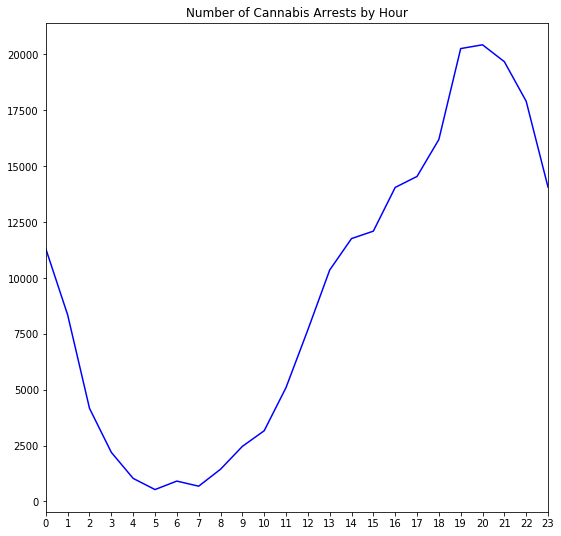

In [111]:
hour.plot(xticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], figsize=(9, 9), c='blue', title='Number of Cannabis Arrests by Hour')

It has been well reported that during Mayor Bloomberg's time as mayor, cannabis arrests reached their peak. One can see that 2006 has 15,127 arrests, and that this increases to 24,468 arrests in 2010. This holds fairly steady for 2011 (23,827), drops a bit in 2012 (20,611) as criticism of Bloomberg's "stop and frisk" program mounts, and then drops significantly in 2013 (16,206) when the "stop and frisk" program is judged as unconstitutional by Judge Scheindlin (Goldstein, NY Times, 2013). Mayor DeBlasio, who vowed to reverse the program, took office in 2014, but cannabis arrests remained fairly consistent in that year compared to 2013 (15,787). By 2015, the number was still fairly high but dropped significantly (11,424). This number stayed consistent through 2017, and then dropped by half in 2018 as discussions of cannabis legalization in New York intensified.

In [112]:
year = nyc['start_year'].value_counts().sort_index()
year

2006    15127
2007    19686
2008    20571
2009    23612
2010    24467
2011    23827
2012    20611
2013    16206
2014    15787
2015    11424
2016    11789
2017    11458
2018     5739
Name: start_year, dtype: int64

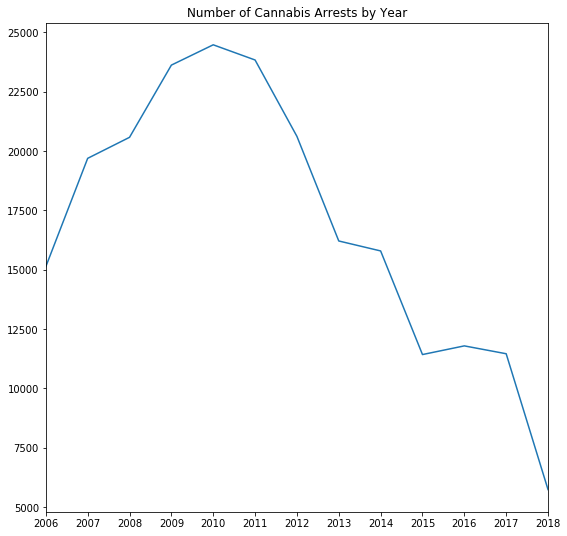

In [113]:
year.plot(xticks=[2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], figsize=(9, 9), title='Number of Cannabis Arrests by Year')

Each month of the year has about the same amount of cannabis arrests, but August has the highest number and the number drops in November and December during the Holiday season.

In [114]:
month = nyc['start_month'].value_counts().sort_index()
month

1     18328
2     17732
3     19767
4     18936
5     19534
6     18157
7     18844
8     20707
9     19374
10    19425
11    15925
12    13575
Name: start_month, dtype: int64

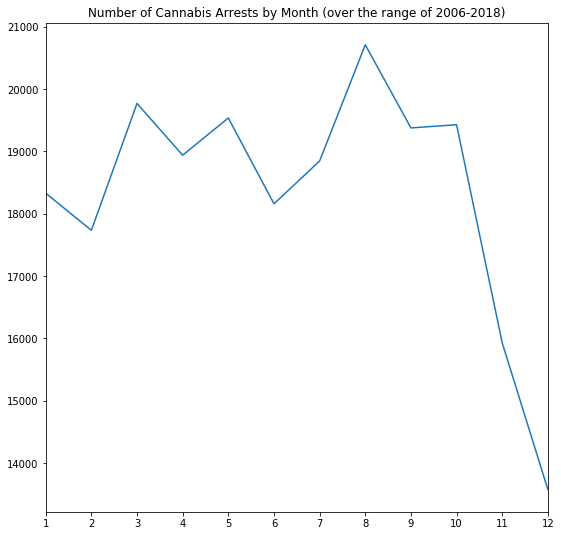

In [115]:
month.plot(xticks=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], figsize=(9, 9), title='Number of Cannabis Arrests by Month (over the range of 2006-2018)')

Each day of the month has a fairly consistent number of cannabis arrests, ranging from 5,660 to 7,900 arrests a day. The number drops somewhat in the last 10 days of the month. The 31st has roughly half the arrests as the rest of the month, because not every month has 31 days.

In [116]:
day = nyc['start_day'].value_counts().sort_index()
day

1     7231
2     7524
3     7607
4     7258
5     7605
6     7427
7     7329
8     7887
9     7685
10    7774
11    7852
12    7900
13    7687
14    7434
15    7519
16    7560
17    7350
18    7251
19    7253
20    7750
21    7344
22    6955
23    6925
24    6688
25    6559
26    6498
27    6752
28    6654
29    6004
30    5660
31    3382
Name: start_day, dtype: int64

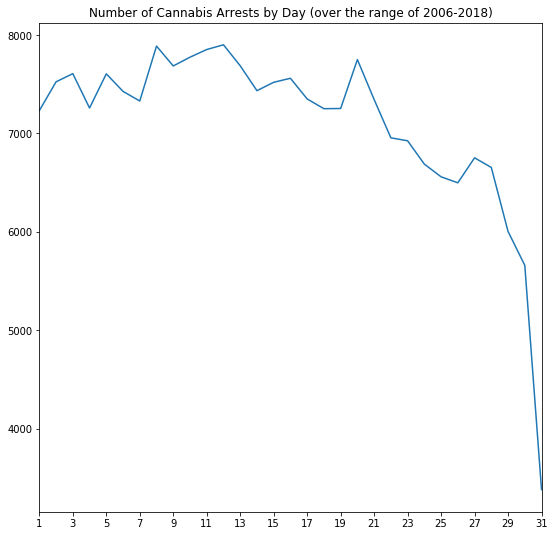

In [117]:
day.plot(xticks=[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31], figsize=(9, 9), title='Number of Cannabis Arrests by Day (over the range of 2006-2018)')

Because of the importance of holidays to various cultural groups, and because of the differences in how certain groups of people are arrested for cannabis, it makes sense to look at whether certain holidays have higher concentrations of cannabis arrests. Due to the cultural diversity of New York City, certain holidays are included that would not be typically celebrated in other parts of the United States. Intriguingly, the holidays with the highest number of cannabis arrests are Hindu, Jewish, and Muslim holidays. Diwali had 656 arrests, Yom Kippur has 707, Rosh Hashanah has 677, Eid al-Fitr has 644, and Eid al-Adha has 544. St. Patrick's Day also has a high number at 542, which may be due to co-occurring cannabis use that happens during the large amount of public drunkenness that occurs on New York City streets on that day.

In [118]:
nyc['new_years_day'].value_counts()

0    219924
1       380
Name: new_years_day, dtype: int64

In [119]:
nyc['new_years_eve'].value_counts()

0    220126
1       178
Name: new_years_eve, dtype: int64

In [120]:
nyc['christmas_eve'].value_counts()

0    220203
1       101
Name: christmas_eve, dtype: int64

In [121]:
nyc['christmas'].value_counts()

0    220245
1        59
Name: christmas, dtype: int64

In [122]:
nyc['july_4th'].value_counts()

0    219779
1       525
Name: july_4th, dtype: int64

In [123]:
nyc['valentines'].value_counts()

0    219773
1       531
Name: valentines, dtype: int64

In [124]:
nyc['halloween'].value_counts()

0    219854
1       450
Name: halloween, dtype: int64

In [125]:
nyc['st_patricks'].value_counts()

0    219762
1       542
Name: st_patricks, dtype: int64

In [126]:
nyc['mlk'].value_counts()

0    219901
1       403
Name: mlk, dtype: int64

In [127]:
nyc['pres'].value_counts()

0    219899
1       405
Name: pres, dtype: int64

In [128]:
nyc['easter'].value_counts()

0    220041
1       263
Name: easter, dtype: int64

In [129]:
nyc['diwali'].value_counts()

0    219648
1       656
Name: diwali, dtype: int64

In [130]:
nyc['pr_parade'].value_counts()

0    219868
1       436
Name: pr_parade, dtype: int64

In [131]:
nyc['yomkippur'].value_counts()

0    219597
1       707
Name: yomkippur, dtype: int64

In [132]:
nyc['rosh_hashanah'].value_counts()

0    219627
1       677
Name: rosh_hashanah, dtype: int64

In [133]:
nyc['eid_al_fitr'].value_counts()

0    219640
1       664
Name: eid_al_fitr, dtype: int64

In [134]:
nyc['eid_al_adha'].value_counts()

0    219760
1       544
Name: eid_al_adha, dtype: int64

In [135]:
nyc['hannukkah'].value_counts()

0    219873
1       431
Name: hannukkah, dtype: int64

In [136]:
nyc['memorial_day'].value_counts()

0    220079
1       225
Name: memorial_day, dtype: int64

In [137]:
nyc['labor_day'].value_counts()

0    219913
1       391
Name: labor_day, dtype: int64

In [138]:
nyc['thanksgiving'].value_counts()

0    220189
1       115
Name: thanksgiving, dtype: int64

The picture that emerges from exploring the descriptive statistics of cannabis arrests in New York City between 2006 and 2018 is one of racial bias against African-Americans and Hispanics for all five levels of cannabis crimes. This is further supported by looking at the geographic areas where these arrests are occurring, and seeing that from every angle the geographic areas being hit the most are boroughs, precincts, neighborhoods, and housing projects that are predominantly occupied by African-American and Hispanic residents. These arrests are largely happening during the evening and early nighttime hours of the day, and it was also seen that there are not huge spikes in holiday arrests except for those holidays intrinsically linked with religious minorities. 

Citations:

Harcourt, B.E. & Ludwig, J., "Reefer Madness: Broken Windows Policing and Misdemeanor Marijuana Arrests in New York", University of Chicago Law School: Chicago Unbound, Working Papers, 2006, https://chicagounbound.uchicago.edu/cgi/viewcontent.cgi?article=1250&context=public_law_and_legal_theory

Levine, H., Sociology Department, Queens College, "Unjust and Unconstitutional", Marijuana Arrest Research Project and the Drug Policy Alliance, July 2017, https://www.drugpolicy.org/sites/default/files/Marijuana-Arrests-NYC--Unjust-Unconstitutional--July2017_2.pdf

Mueller, B., Gebeloff, R., Chinoy, S., "Surest Way to Face Marijuana Charges in New York: Be Black or Hispanic", New York Times, May 13, 2018, https://www.nytimes.com/2018/05/13/nyregion/marijuana-arrests-nyc-race.html

Results from the 2016 National Survey on Drug Use and Health: Detailed Tables, SAMHSA, 2016, https://www.samhsa.gov/data/sites/default/files/NSDUH-DetTabs-2016/NSDUH-DetTabs-2016.pdf

"New York State Penal Law". Article 221,  No. 221 of 2016. Retrieved November 13, 2016.

Goldstein, J., "Judge Rejects New York's Stop-and-Frisk Policy", New York Times, August 12, 2013, https://www.nytimes.com/2013/08/13/nyregion/stop-and-frisk-practice-violated-rights-judge-rules.html